# Foundation

Before we get started, let’s make sure you are in the right place. This book is for developers that
may know some applied machine learning. Maybe you know how to work through a predictive
modeling problem end-to-end, or at least most of the main steps, with popular tools. The
lessons in this book do assume a few things about you, such as:

 You know your way around basic Python for programming.

 You may know some basic NumPy for array manipulation.

 You may know some basic Scikit-Learn for modeling.

This guide was written in the top-down and results-first machine learning style that you’re
used to from Machine Learning Mastery.

# Chapter 1 Introduction


Data preparation may be one of the most difficult steps in any machine learning project. The
reason is that each dataset is different and highly specific to the project. Nevertheless, there are
enough commonalities across predictive modeling projects that we can define a loose sequence of
steps and subtasks that you are likely to perform. This process provides a context in which we
can consider the data preparation required for the project, informed both by the definition of the
project performed before data preparation and the evaluation of machine learning algorithms
performed after.

# Chapter 2  Why Data Preparation is So Important

On a predictive modeling project, machine learning algorithms learn a mapping from input
variables to a target variable. The most common form of predictive modeling project involves
so-called structured data or tabular data. This is data as it looks in a spreadsheet or a matrix,
with rows of examples and columns of features for each example. We cannot fit and evaluate
machine learning algorithms on raw data; instead, we must transform the data to meet the
requirements of individual machine learning algorithms. More than that, we must choose a
representation for the data that best exposes the unknown underlying structure of the prediction
problem to the learning algorithms in order to get the best performance given our available
resources on a predictive modeling project.

# Chapter 3  Tour of Data Preparation Techniques

Predictive modeling machine learning projects, such as classification and regression, always
involve some form of data preparation. The specific data preparation required for a dataset
depends on the specifics of the data, such as the variable types, as well as the algorithms that
will be used to model them that may impose expectations or requirements on the data.
Nevertheless, there is a collection of standard data preparation algorithms that can be
applied to structured data (e.g. data that forms a large table like in a spreadsheet). These
data preparation algorithms can be organized or grouped by type into a framework that can
be helpful when comparing and selecting techniques for a specific project.

We can define data preparation as the transformation of raw data into a form that is more
suitable for modeling. Nevertheless, there are steps in a predictive modeling project before and
after the data preparation step that are important and inform the data preparation that is to be
performed. The process of applied machine learning consists of a sequence of steps (introduced
in Chapter 1). We may jump back and forth between the steps for any given project, but all
projects have the same general steps;

# Chapter 4 Data Preparation With Train and Test Sets


Data preparation is the process of transforming raw data into a form that is appropriate for
modeling. A naive approach to preparing data applies the transform on the entire dataset before
evaluating the performance of the model. This results in a problem referred to as data leakage,
where knowledge of the hold-out test set leaks into the dataset used to train the model. This
can result in an incorrect estimate of model performance when making predictions on new data.
A careful application of data preparation techniques is required in order to avoid data leakage,
and this varies depending on the model evaluation scheme used, such as train-test splits or
k-fold cross-validation. In this tutorial, you will discover how to avoid data leakage during data
preparation when evaluating machine learning models. After completing this tutorial, you will
know:
 Naive application of data preparation methods to the whole dataset results in data leakage
that causes incorrect estimates of model performance.
 Data preparation must be prepared on the training set only in order to avoid data leakage.
 How to implement data preparation without data leakage for train-test splits and k-fold
cross-validation in Python.

# Chapter 5 Data Cleaning

Identify Columns That Contain a Single Value

In [ ]:
# summarize the number of unique values for each column using numpy
from numpy import loadtxt
from numpy import unique
# load the dataset
data = loadtxt('oil-spill.csv', delimiter=',')
# summarize the number of unique values in each column
for i in range(data.shape[1]):
  print(i, len(unique(data[:, i])))

0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


simpler approach to reporting the number of unique values in each
column.

In [ ]:
# summarize the number of unique values for each column using numpy
from pandas import read_csv
# load the dataset
df = read_csv('oil-spill.csv', header=None)
# summarize the number of unique values in each column
print(df.nunique())

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


## Delete Columns That Contain a Single Value

deleting columns that have a single value.

In [ ]:
# delete columns with a single unique value
from pandas import read_csv
# load the dataset
df = read_csv('oil-spill.csv', header=None)
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]


print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 50)
[22]
(937, 49)


## Consider Columns That Have Very Few Values

reporting the variance of each variable.

In [ ]:
# summarize the percentage of unique values for each column using numpy
from numpy import loadtxt
from numpy import unique
# load the dataset
data = loadtxt('oil-spill.csv', delimiter=',')
# summarize the number of unique values in each column
for i in range(data.shape[1]):
  num = len(unique(data[:, i]))
  percentage = float(num) / data.shape[0] * 100
  print('%d, %d, %.1f%%' % (i, num, percentage))

0, 238, 25.4%
1, 297, 31.7%
2, 927, 98.9%
3, 933, 99.6%
4, 179, 19.1%
5, 375, 40.0%
6, 820, 87.5%
7, 618, 66.0%
8, 561, 59.9%
9, 57, 6.1%
10, 577, 61.6%
11, 59, 6.3%
12, 73, 7.8%
13, 107, 11.4%
14, 53, 5.7%
15, 91, 9.7%
16, 893, 95.3%
17, 810, 86.4%
18, 170, 18.1%
19, 53, 5.7%
20, 68, 7.3%
21, 9, 1.0%
22, 1, 0.1%
23, 92, 9.8%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
27, 308, 32.9%
28, 447, 47.7%
29, 392, 41.8%
30, 107, 11.4%
31, 42, 4.5%
32, 4, 0.4%
33, 45, 4.8%
34, 141, 15.0%
35, 110, 11.7%
36, 3, 0.3%
37, 758, 80.9%
38, 9, 1.0%
39, 9, 1.0%
40, 388, 41.4%
41, 220, 23.5%
42, 644, 68.7%
43, 649, 69.3%
44, 499, 53.3%
45, 2, 0.2%
46, 937, 100.0%
47, 169, 18.0%
48, 286, 30.5%
49, 2, 0.2%


the percentage of unique values for each column using numpy and reporting on columns with low variance.

In [ ]:
from numpy import loadtxt
from numpy import unique
# load the dataset
data = loadtxt('oil-spill.csv', delimiter=',')
# summarize the number of unique values in each column
for i in range(data.shape[1]):
  num = len(unique(data[:, i]))
  percentage = float(num) / data.shape[0] * 100
  if percentage < 1:
    print('%d, %d, %.1f%%' % (i, num, percentage))

21, 9, 1.0%
22, 1, 0.1%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
32, 4, 0.4%
36, 3, 0.3%
38, 9, 1.0%
39, 9, 1.0%
45, 2, 0.2%
49, 2, 0.2%


Remove Columns That Have A Low Variance i.e, delete columns where number of unique values is less than 1% of the rows

In [ ]:
from pandas import read_csv
# load the dataset
df = read_csv('oil-spill.csv', header=None)
print(df.shape)
# get number of unique values for each column
counts = df.nunique()
# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1]
print(to_del)
# drop useless columns
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 50)
[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
(937, 39)


## Remove Columns That Have A Low Variance

applying the variance threshold for feature selection

In [ ]:
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
# load the dataset
df = read_csv('oil-spill.csv', header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define the transform
transform = VarianceThreshold()
# transform the input data
X_sel = transform.fit_transform(X)
print(X_sel.shape)

(937, 49) (937,)
(937, 48)


the effect of the variance thresholds on the number of selected features

(937, 49) (937,)
>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


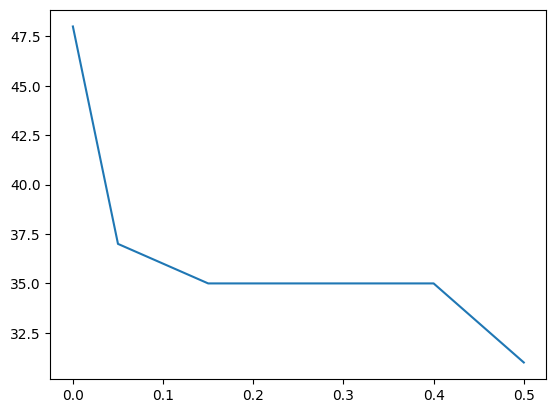

In [ ]:
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
# load the dataset
df = read_csv('oil-spill.csv', header=None)
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)
# apply transform with each threshold
results = list()
for t in thresholds:
  # define the transform
  transform = VarianceThreshold(threshold=t)
  # transform the input data
  X_sel = transform.fit_transform(X)
  # determine the number of input features
  n_features = X_sel.shape[1]
  print('>Threshold=%.2f, Features=%d' % (t, n_features))
  # store the result
  results.append(n_features)
# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.show()

## Identify Rows That Contain Duplicate Data

checks for duplicates.

In [ ]:
# locate rows of duplicate data
from pandas import read_csv
# load the dataset
df = read_csv('iris.csv', header=None)
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

True
       0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica


## Delete Rows That Contain Duplicate Data

deleting duplicate rows from a dataset.

In [ ]:
# delete rows of duplicate data from the dataset
from pandas import read_csv
# load the dataset
df = read_csv('iris.csv', header=None)
print(df.shape)
# delete duplicate rows
df.drop_duplicates(inplace=True)
print(df.shape)

(150, 5)
(147, 5)


# Chapter 6  Outlier Identification and Removal

## Test Dataset

generate gaussian data with a synthetic dataset with outliers.

In [ ]:
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.049 stdv=4.994


## Standard Deviation Method

a identifying and removing outliers using the standard deviation.

In [ ]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# define outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers


outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 29
Non-outlier observations: 9971


## Interquartile Range Method

identifying and removing outliers using the IQR.

In [ ]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=46.685, 75th=53.359, IQR=6.674
Identified outliers: 81
Non-outlier observations: 9919


## Automatic Outlier Detection

loading and summarizing the regression dataset.

In [ ]:
# load and summarize the dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
# load the dataset
df = read_csv('housing.csv', header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# summarize the shape of the dataset
print(X.shape, y.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(506, 13) (506,)
(339, 13) (167, 13) (339,) (167,)


evaluating a model on the regression dataset.

In [ ]:
# evaluate model on the raw dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# load the dataset
df = read_csv('housing.csv', header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model


yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3.417


evaluate model on training dataset with outliers removed

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
# load the dataset
df = read_csv('housing.csv', header=None)
# retrieve the array
data = df.values
# split into input and output elements


X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(339, 13) (339,)
(305, 13) (305,)
MAE: 3.356


# Chapter 7 How to Mark and Remove Missing Data

## Diabetes Dataset

Mark Missing Values

In [ ]:
# load and summarize the dataset
from pandas import read_csv
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# summarize the dataset
print(dataset.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

loading and summarizing the first few rows of the dataset.

In [ ]:
# load the dataset and review rows
from pandas import read_csv
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# summarize the first 20 rows of data
print(dataset.head(20))

     0    1   2   3    4     5      6   7  8
0    6  148  72  35    0  33.6  0.627  50  1
1    1   85  66  29    0  26.6  0.351  31  0
2    8  183  64   0    0  23.3  0.672  32  1
3    1   89  66  23   94  28.1  0.167  21  0
4    0  137  40  35  168  43.1  2.288  33  1
5    5  116  74   0    0  25.6  0.201  30  0
6    3   78  50  32   88  31.0  0.248  26  1
7   10  115   0   0    0  35.3  0.134  29  0
8    2  197  70  45  543  30.5  0.158  53  1
9    8  125  96   0    0   0.0  0.232  54  1
10   4  110  92   0    0  37.6  0.191  30  0
11  10  168  74   0    0  38.0  0.537  34  1
12  10  139  80   0    0  27.1  1.441  57  0
13   1  189  60  23  846  30.1  0.398  59  1
14   5  166  72  19  175  25.8  0.587  51  1
15   7  100   0   0    0  30.0  0.484  32  1
16   0  118  84  47  230  45.8  0.551  31  1
17   7  107  74   0    0  29.6  0.254  31  1
18   1  103  30  38   83  43.3  0.183  33  0
19   1  115  70  30   96  34.6  0.529  32  1


reporting the number of missing values in each column.

In [ ]:
# example of summarizing the number of missing values for each variable
from pandas import read_csv
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# count the number of missing values for each column
num_missing = (dataset[[1,2,3,4,5]] == 0).sum()
# report the results
print(num_missing)

1      5
2     35
3    227
4    374
5     11
dtype: int64


marking missing values in the dataset.

In [ ]:
# example of marking missing values with nan values
from numpy import nan
from pandas import read_csv
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# count the number of nan values in each column
print(dataset.isnull().sum())

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


reviewing rows of data with missing values marked.

In [ ]:
# example of review data with missing values marked with a nan
from numpy import nan
from pandas import read_csv
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# summarize the first 20 rows of data
print(dataset.head(20))

     0      1     2     3      4     5      6   7  8
0    6  148.0  72.0  35.0    NaN  33.6  0.627  50  1
1    1   85.0  66.0  29.0    NaN  26.6  0.351  31  0
2    8  183.0  64.0   NaN    NaN  23.3  0.672  32  1
3    1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4    0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
5    5  116.0  74.0   NaN    NaN  25.6  0.201  30  0
6    3   78.0  50.0  32.0   88.0  31.0  0.248  26  1
7   10  115.0   NaN   NaN    NaN  35.3  0.134  29  0
8    2  197.0  70.0  45.0  543.0  30.5  0.158  53  1
9    8  125.0  96.0   NaN    NaN   NaN  0.232  54  1
10   4  110.0  92.0   NaN    NaN  37.6  0.191  30  0
11  10  168.0  74.0   NaN    NaN  38.0  0.537  34  1
12  10  139.0  80.0   NaN    NaN  27.1  1.441  57  0
13   1  189.0  60.0  23.0  846.0  30.1  0.398  59  1
14   5  166.0  72.0  19.0  175.0  25.8  0.587  51  1
15   7  100.0   NaN   NaN    NaN  30.0  0.484  32  1
16   0  118.0  84.0  47.0  230.0  45.8  0.551  31  1
17   7  107.0  74.0   NaN    NaN  29.6  0.254 

## Missing Values Cause Problems

error caused by the presence of missing values.

In [ ]:
# example where missing values cause errors
from numpy import nan
from pandas import read_csv
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# split dataset into inputs and outputs
values = dataset.values
X = values[:,0:8]
y = values[:,8]
# define the model
model = LinearDiscriminantAnalysis()
# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model

result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

ValueError: ignored

## Remove Rows With Missing Values

# Chapter 8  How to Use Statistical Imputation

removing rows that contain missing values.

In [ ]:
# example of removing rows that contain missing values
from numpy import nan
from pandas import read_csv
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# summarize the shape of the raw data
print(dataset.shape)
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# drop rows with missing values
dataset.dropna(inplace=True)
# summarize the shape of the data with missing rows removed
print(dataset.shape)

(768, 9)
(392, 9)


evaluating a model after rows with missing values are removed.

In [ ]:
# evaluate model on data after rows with missing data are removed
from numpy import nan
from pandas import read_csv
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# drop rows with missing values
dataset.dropna(inplace=True)
# split dataset into inputs and outputs
values = dataset.values
X = values[:,0:8]
y = values[:,8]
# define the model
model = LinearDiscriminantAnalysis()
# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

Accuracy: 0.781


## Horse Colic Dataset

loading and summarizing a dataset with missing values.

In [ ]:
# summarize the horse colic dataset
from pandas import read_csv
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# summarize the first few rows
print(dataframe.head())
# summarize the number of rows with missing values for each column
for i in range(dataframe.shape[1]):
# count number of rows with missing values
  n_miss = dataframe[[i]].isnull().sum()
  perc = n_miss / dataframe.shape[0] * 100
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]
> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, M

## Statistical Imputation With SimpleImputer

imputing missing values in the dataset.

In [ ]:
# statistical imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer


# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# summarize total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = SimpleImputer(strategy='mean')
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# summarize total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


### SimpleImputer and Model Evaluation

evaluating a model on a dataset with statistical imputation.

In [ ]:
# evaluate mean imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# define modeling pipeline
model = RandomForestClassifier()
imputer = SimpleImputer(strategy='mean')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.864 (0.052)


## Comparing Different Imputed Statistics

comparing model performance with different statistical imputation
strategies.

>mean 0.864 (0.049)
>median 0.870 (0.053)
>most_frequent 0.862 (0.060)
>constant 0.881 (0.049)


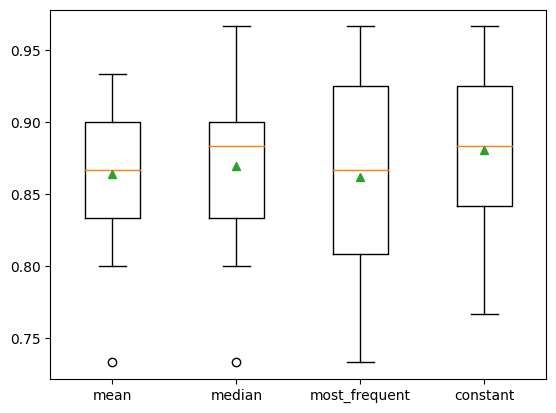

In [ ]:
# compare statistical imputation strategies for the horse colic dataset
from numpy import mean


from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
# create the modeling pipeline
  pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m',
  RandomForestClassifier())])
  # evaluate the model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  # store results
  results.append(scores)
  print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

### SimpleImputer Transform When Making a Prediction

# Chapter 9  How to Use KNN Imputation

making a prediction on data with missing values.

In [ ]:
# constant imputation strategy and prediction for the horse colic dataset
from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer


from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# create the modeling pipeline
pipeline = Pipeline(steps=[('i', SimpleImputer(strategy='constant')), ('m',
RandomForestClassifier())])
# fit the model
pipeline.fit(X, y)
# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00,
8.40, nan, nan, 2, 11300, 00000, 00000, 2]
# make a prediction
yhat = pipeline.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


## Horse Colic Dataset

loading and summarizing a dataset with missing values.

In [ ]:
# summarize the horse colic dataset
from pandas import read_csv
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# summarize the first few rows
print(dataframe.head())
# summarize the number of rows with missing values for each column
for i in range(dataframe.shape[1]):
# count number of rows with missing values
  n_miss = dataframe[[i]].isnull().sum()
  perc = n_miss / dataframe.shape[0] * 100
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]
> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, M

## Nearest Neighbor Imputation with KNNImputer

### KNNImputer Data Transform

using the KNNImputer to impute missing values.

In [ ]:
# knn imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# summarize total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# summarize total missing


print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


### KNNImputer and Model Evaluation

evaluating a model on a dataset transformed with the KNNImputer.

In [ ]:
# evaluate knn imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# define modeling pipeline
model = RandomForestClassifier()
imputer = KNNImputer()


pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.863 (0.060)


### KNNImputer and Different Number of Neighbors

comparing the number of neighbors used in the KNNImputer transform
when evaluating a model.

>1 0.862 (0.056)
>3 0.857 (0.058)
>5 0.866 (0.056)
>7 0.858 (0.056)
>9 0.863 (0.057)
>15 0.861 (0.056)
>18 0.858 (0.053)
>21 0.863 (0.058)


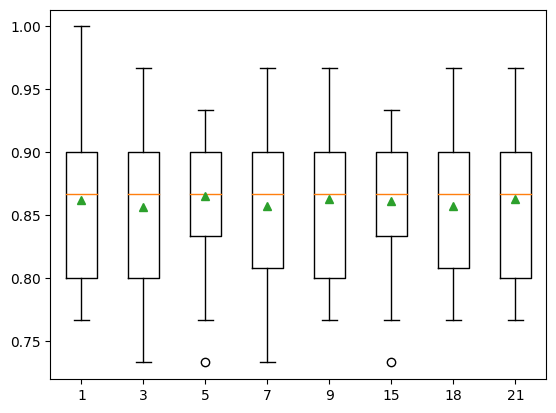

In [ ]:
# compare knn imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:
# create the modeling pipeline
  pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m',
  RandomForestClassifier())])
  # evaluate the model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  # store results
  results.append(scores)
  print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

### KNNImputer Transform When Making a Prediction

making a prediction on data with missing values.

In [ ]:
# knn imputation strategy and prediction for the horse colic dataset
from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer


from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# create the modeling pipeline
pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=21)), ('m',
RandomForestClassifier())])
# fit the model
pipeline.fit(X, y)
# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00,
8.40, nan, nan, 2, 11300, 00000, 00000, 2]
# make a prediction
yhat = pipeline.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


# Chapter 10 How to Use Iterative Imputation

## Iterative Imputation

loading and summarizing a dataset with missing values.

In [ ]:
# summarize the horse colic dataset
from pandas import read_csv
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# summarize the first few rows
print(dataframe.head())
# summarize the number of rows with missing values for each column
for i in range(dataframe.shape[1]):
# count number of rows with missing values
  n_miss = dataframe[[i]].isnull().sum()
  perc = n_miss / dataframe.shape[0] * 100
  print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]
> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, M

## Iterative Imputation With IterativeImputer

### IterativeImputer Data Transform

using the IterativeImputer to impute missing values.

In [ ]:
# iterative imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# summarize total missing
print('Missing: %d' % sum(isnan(X).flatten()))
# define imputer
imputer = IterativeImputer()
# fit on the dataset
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)
# summarize total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


### IterativeImputer and Model Evaluation

evaluating a model on a dataset transformed with the
IterativeImputer.

In [ ]:
# evaluate iterative imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# define modeling pipeline
model = RandomForestClassifier()
imputer = IterativeImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model


scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.873 (0.051)


### IterativeImputer and Different Imputation Order

comparing model performance with different data order in the
IterativeImputer.

>ascending 0.872 (0.050)
>descending 0.870 (0.057)
>roman 0.873 (0.052)
>arabic 0.876 (0.049)
>random 0.871 (0.051)


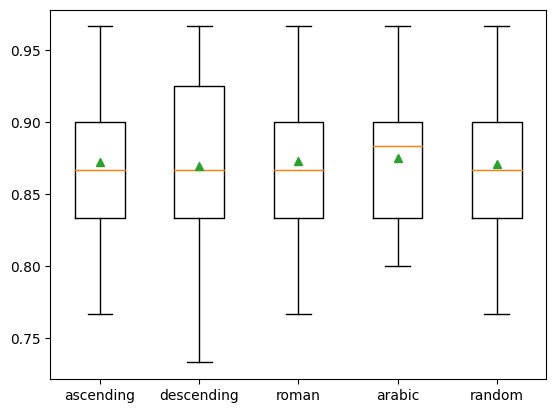

In [ ]:
# compare iterative imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# evaluate each strategy on the dataset
results = list()
strategies = ['ascending', 'descending', 'roman', 'arabic', 'random']
for s in strategies:
# create the modeling pipeline
  pipeline = Pipeline(steps=[('i', IterativeImputer(imputation_order=s)), ('m',
  RandomForestClassifier())])
  # evaluate the model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  # store results
  results.append(scores)
  print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

### IterativeImputer and Different Number of Iterations

comparing model performance with different number of iterations in
the IterativeImputer.

>1 0.868 (0.051)
>2 0.867 (0.053)
>3 0.868 (0.055)
>4 0.870 (0.053)
>5 0.873 (0.052)
>6 0.867 (0.052)
>7 0.871 (0.051)
>8 0.871 (0.052)
>9 0.867 (0.059)
>10 0.872 (0.052)
>11 0.873 (0.056)
>12 0.870 (0.055)
>13 0.870 (0.053)
>14 0.874 (0.044)
>15 0.869 (0.051)
>16 0.867 (0.052)
>17 0.871 (0.048)
>18 0.868 (0.047)
>19 0.866 (0.052)
>20 0.873 (0.050)


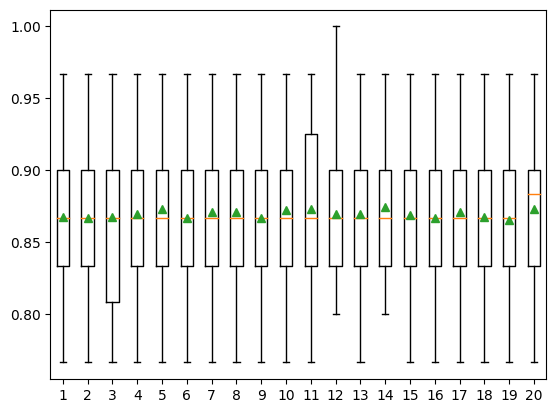

In [ ]:
# compare iterative imputation number of iterations for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements

data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in range(1, 21)]
for s in strategies:
# create the modeling pipeline
  pipeline = Pipeline(steps=[('i', IterativeImputer(max_iter=int(s))), ('m',
  RandomForestClassifier())])
  # evaluate the model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  # store results
  results.append(scores)
  print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

### IterativeImputer Transform When Making a Prediction

making a prediction on data with missing values.

In [ ]:
# iterative imputation strategy and prediction for the horse colic dataset
from numpy import nan

from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')
# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]
# create the modeling pipeline
pipeline = Pipeline(steps=[('i', IterativeImputer()), ('m', RandomForestClassifier())])
# fit the model
pipeline.fit(X, y)
# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00,
8.40, nan, nan, 2, 11300, 00000, 00000, 2]
# make a prediction
yhat = pipeline.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


# Chapter 11 Feature Selection

Feature selection is the process of reducing the number of input variables when developing a
predictive model. It is desirable to reduce the number of input variables to both reduce the
computational cost of modeling and, in many cases, to improve the performance of the model.
Statistical-based feature selection methods involve evaluating the relationship between each
input variable and the target variable using statistics and selecting those input variables that
have the strongest relationship with the target variable. These methods can be fast and effective,
although the choice of statistical measures depends on the data type of both the input and
output variables.

# Chapter 12 How to Select Categorical Input Features

loading and splitting the categorical dataset.

In [ ]:
# load and summarize the dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
# load the dataset
def load_dataset(filename):
# load the dataset
  data = read_csv(filename, header=None)
  # retrieve array
  dataset = data.values
  # split into input and output variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  # format all fields as string
  X = X.astype(str)
  return X, y
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (191, 9) (191,)
Test (95, 9) (95,)


loading and encoding the categorical variables.

In [ ]:
# example of loading and preparing the breast cancer dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
# load the dataset
def load_dataset(filename):
# load the dataset
  data = read_csv(filename, header=None)
  # retrieve array
  dataset = data.values
  # split into input and output variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  # format all fields as string
  X = X.astype(str)
  return X, y
# prepare input data
def prepare_inputs(X_train, X_test):
  oe = OrdinalEncoder()
  oe.fit(X_train)
  X_train_enc = oe.transform(X_train)
  X_test_enc = oe.transform(X_test)
  return X_train_enc, X_test_enc
# prepare target
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_enc = le.transform(y_train)
  y_test_enc = le.transform(y_test)
  return y_train_enc, y_test_enc
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# summarize
print('Train', X_train_enc.shape, y_train_enc.shape)
print('Test', X_test_enc.shape, y_test_enc.shape)

Train (191, 9) (191,)
Test (95, 9) (95,)


## Categorical Feature Selection

### Chi-Squared Feature Selection

chi-squared feature selection and summarizing the selected
features.

Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


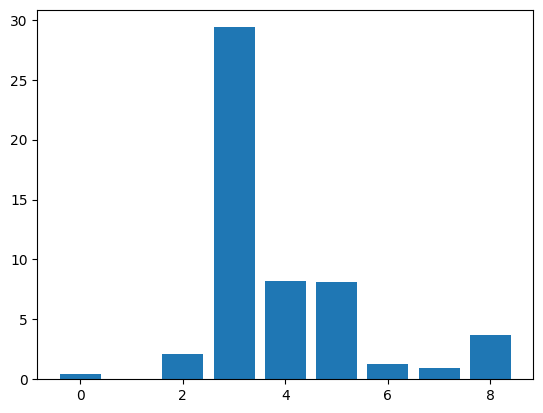

In [ ]:
# example of chi squared feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
# load the dataset
def load_dataset(filename):
# load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)
  # retrieve numpy array
  dataset = data.values
  # split into input (X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  # format all fields as string
  X = X.astype(str)
  return X, y
# prepare input data
def prepare_inputs(X_train, X_test):
  oe = OrdinalEncoder()
  oe.fit(X_train)
  X_train_enc = oe.transform(X_train)
  X_test_enc = oe.transform(X_test)
  return X_train_enc, X_test_enc
# prepare target
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_enc = le.transform(y_train)
  y_test_enc = le.transform(y_test)
  return y_train_enc, y_test_enc
# feature selection
def select_features(X_train, y_train, X_test):
  fs = SelectKBest(score_func=chi2, k='all')
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)

  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Mutual Information Feature Selection

applying mutual information feature selection and summarizing the
selected features.

Feature 0: 0.000000
Feature 1: 0.009027
Feature 2: 0.047327
Feature 3: 0.047026
Feature 4: 0.049939
Feature 5: 0.059758
Feature 6: 0.000000
Feature 7: 0.000000
Feature 8: 0.000000


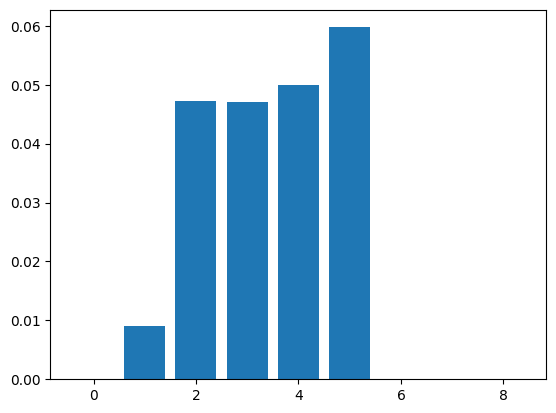

In [ ]:
# example of mutual information feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
# load the dataset
def load_dataset(filename):
# load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)
  # retrieve numpy array
  dataset = data.values
  # split into input (X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  # format all fields as string
  X = X.astype(str)
  return X, y
# prepare input data
def prepare_inputs(X_train, X_test):
  oe = OrdinalEncoder()
  oe.fit(X_train)
  X_train_enc = oe.transform(X_train)
  X_test_enc = oe.transform(X_test)
  return X_train_enc, X_test_enc
# prepare target
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_enc = le.transform(y_train)
  y_test_enc = le.transform(y_test)
  return y_train_enc, y_test_enc
# feature selection
def select_features(X_train, y_train, X_test):
  fs = SelectKBest(score_func=mutual_info_classif, k='all')
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

## Modeling With Selected Features

evaluating a model using all features in the dataset.

In [ ]:
# evaluation of a model using all input features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# load the dataset
def load_dataset(filename):
# load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)
  # retrieve numpy array
  dataset = data.values
  # split into input (X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  # format all fields as string
  X = X.astype(str)
  return X, y
# prepare input data
def prepare_inputs(X_train, X_test):
  oe = OrdinalEncoder()
  oe.fit(X_train)
  X_train_enc = oe.transform(X_train)
  X_test_enc = oe.transform(X_test)
  return X_train_enc, X_test_enc
# prepare target
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_enc = le.transform(y_train)
  y_test_enc = le.transform(y_test)
  return y_train_enc, y_test_enc
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.79


### Model Built Using Chi-Squared Features

evaluating a model using features selected by chi-squared statistics.

In [ ]:
# evaluation of a model fit using chi squared input features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# load the dataset
def load_dataset(filename):
# load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)
  # retrieve numpy array
  dataset = data.values
  # split into input (X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  # format all fields as string
  X = X.astype(str)
  return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
  oe = OrdinalEncoder()
  oe.fit(X_train)
  X_train_enc = oe.transform(X_train)
  X_test_enc = oe.transform(X_test)
  return X_train_enc, X_test_enc
# prepare target
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_enc = le.transform(y_train)
  y_test_enc = le.transform(y_test)
  return y_train_enc, y_test_enc
# feature selection
def select_features(X_train, y_train, X_test):
  fs = SelectKBest(score_func=chi2, k=4)
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 74.74


### Model Built Using Mutual Information Features

evaluating a model using features selected by mutual information
statistics.

In [ ]:
# evaluation of a model fit using mutual information input features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# load the dataset
def load_dataset(filename):
# load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)
  # retrieve numpy array
  dataset = data.values
  # split into input (X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  # format all fields as string
  X = X.astype(str)
  return X, y
# prepare input data
def prepare_inputs(X_train, X_test):
  oe = OrdinalEncoder()
  oe.fit(X_train)
  X_train_enc = oe.transform(X_train)
  X_test_enc = oe.transform(X_test)
  return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
  le = LabelEncoder()
  le.fit(y_train)
  y_train_enc = le.transform(y_train)
  y_test_enc = le.transform(y_test)
  return y_train_enc, y_test_enc
# feature selection
def select_features(X_train, y_train, X_test):
  fs = SelectKBest(score_func=mutual_info_classif, k=4)
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs
# load the dataset
X, y = load_dataset('breast-cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 69.47


# Chapter 13 How to Select Numerical Input Features

## Diabetes Numerical Dataset

of loading and splitting the diabetes dataset.

In [ ]:
# load and summarize the dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
# load the dataset
def load_dataset(filename):
# load the dataset as a pandas DataFrame

  data = read_csv(filename, header=None)
  # retrieve numpy array
  dataset = data.values
  # split into input (X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  return X, y
# load the dataset
X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (514, 8) (514,)
Test (254, 8) (254,)


## Numerical Feature Selection

### ANOVA F-test Feature Selection

of applying ANOVA F-statistic feature selection and summarizing the
selected features.

Feature 0: 16.527385
Feature 1: 131.325562
Feature 2: 0.042371
Feature 3: 1.415216
Feature 4: 12.778966
Feature 5: 49.209523
Feature 6: 13.377142
Feature 7: 25.126440


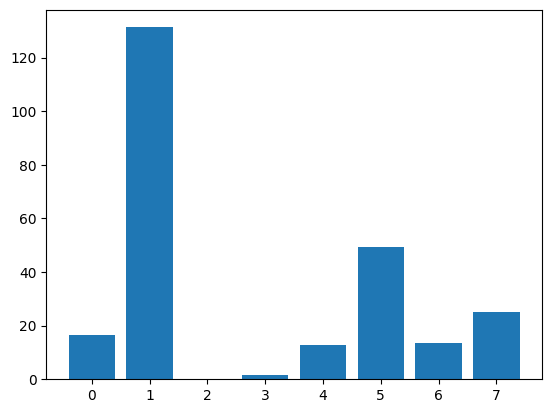

In [ ]:
# example of anova f-test feature selection for numerical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
# load the dataset
def load_dataset(filename):
# load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)
  # retrieve numpy array
  dataset = data.values
  # split into input (X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  return X, y

# feature selection
def select_features(X_train, y_train, X_test):
# configure to select all features
  fs = SelectKBest(score_func=f_classif, k='all')
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
# load the dataset
X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Mutual Information Feature Selection

applying mutual information feature selection and summarizing the
selected features.

Feature 0: 0.064454
Feature 1: 0.095476
Feature 2: 0.010163
Feature 3: 0.010760
Feature 4: 0.020791
Feature 5: 0.077254
Feature 6: 0.010328
Feature 7: 0.050851


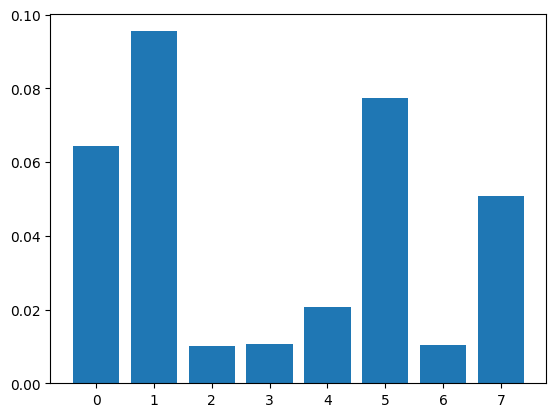

In [ ]:
# example of mutual information feature selection for numerical input data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
# load the dataset
def load_dataset(filename):
# load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)
  # retrieve numpy array
  dataset = data.values
  # split into input (X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  return X, y
# feature selection
def select_features(X_train, y_train, X_test):
# configure to select all features
  fs = SelectKBest(score_func=mutual_info_classif, k='all')
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
# load the dataset
X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

## Modeling With Selected Features

### Model Built Using All Features

Model Built Using All Features

In [ ]:
# evaluation of a model using all input features
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# load the dataset
def load_dataset(filename):
# load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)
  # retrieve numpy array
  dataset = data.values
  # split into input (X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  return X, y
# load the dataset
X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.56


### Model Built Using ANOVA F-test Features

evaluating a model using features selected using the ANOVA F-
statistic.

In [ ]:
# evaluation of a model using 4 features chosen with anova f-test
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# load the dataset
def load_dataset(filename):
# load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)
  # retrieve numpy array
  dataset = data.values
  # split into input (X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  return X, y

# feature selection
def select_features(X_train, y_train, X_test):
# configure to select a subset of features
  fs = SelectKBest(score_func=f_classif, k=4)
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
# load the dataset
X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 78.74


### Model Built Using Mutual Information Features

evaluating a model using features selected by mutual information
statistics.

In [ ]:
# evaluation of a model using 4 features chosen with mutual information
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# load the dataset
def load_dataset(filename):
# load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)
  # retrieve numpy array
  dataset = data.values
  # split into input (X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  return X, y
# feature selection
def select_features(X_train, y_train, X_test):
# configure to select a subset of features
  fs = SelectKBest(score_func=mutual_info_classif, k=4)
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
# load the dataset
X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions

accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.59


## Tune the Number of Selected Features

grid searching the number of features selected by ANOVA.

In [ ]:
# compare different numbers of features selected using anova f-test
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# load the dataset
def load_dataset(filename):
# load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)
  # retrieve numpy array
  dataset = data.values
  # split into input (X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  return X, y
# define dataset
X, y = load_dataset('pima-indians-diabetes.csv')
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear')
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X.shape[1])]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best Mean Accuracy: 0.770
Best Config: {'anova__k': 5}


comparing model performance versus the number of selected features
with ANOVA.

>1 0.748 (0.048)
>2 0.756 (0.042)
>3 0.761 (0.044)
>4 0.759 (0.042)
>5 0.770 (0.041)
>6 0.766 (0.042)
>7 0.770 (0.042)
>8 0.768 (0.040)


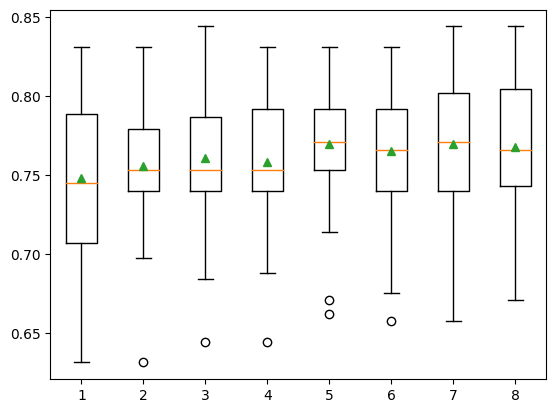

In [ ]:
# compare different numbers of features selected using anova f-test
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load the dataset
def load_dataset(filename):
# load the dataset as a pandas DataFrame
  data = read_csv(filename, header=None)
  # retrieve numpy array
  dataset = data.values
  # split into input (X) and output (y) variables
  X = dataset[:, :-1]
  y = dataset[:,-1]
  return X, y
# evaluate a given model using cross-validation
def evaluate_model(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

  return scores
# define dataset
X, y = load_dataset('pima-indians-diabetes.csv')
# define number of features to evaluate
num_features = [i+1 for i in range(X.shape[1])]
# enumerate each number of features
results = list()
for k in num_features:
# create pipeline
  model = LogisticRegression(solver='liblinear')
  fs = SelectKBest(score_func=f_classif, k=k)
  pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
  # evaluate the model
  scores = evaluate_model(pipeline)
  results.append(scores)
  # summarize the results
  print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()

# Chapter 14 How to Select Features for Numerical Output

## Regression Dataset

defining and splitting the regression dataset.

In [ ]:
# load and summarize the dataset
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1,
random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (670, 100) (670,)
Test (330, 100) (330,)


### Correlation Feature Selection

applying correlation feature selection and summarizing the selected
features.

Feature 0: 0.009419
Feature 1: 1.018881
Feature 2: 1.205187
Feature 3: 0.000138
Feature 4: 0.167511
Feature 5: 5.985083
Feature 6: 0.062405
Feature 7: 1.455257
Feature 8: 0.420384
Feature 9: 101.392225
Feature 10: 0.387091
Feature 11: 1.581124
Feature 12: 3.014463
Feature 13: 0.232705
Feature 14: 0.076281
Feature 15: 4.299652
Feature 16: 1.497530
Feature 17: 0.261242
Feature 18: 5.960005
Feature 19: 0.523219
Feature 20: 0.003365
Feature 21: 0.024178
Feature 22: 0.220958
Feature 23: 0.576770
Feature 24: 0.627198
Feature 25: 0.350687
Feature 26: 0.281877
Feature 27: 0.584210
Feature 28: 52.196337
Feature 29: 0.046855
Feature 30: 0.147323
Feature 31: 0.368485
Feature 32: 0.077631
Feature 33: 0.698140
Feature 34: 45.744046
Feature 35: 2.047376
Feature 36: 0.786270
Feature 37: 0.996190
Feature 38: 2.733533
Feature 39: 63.957656
Feature 40: 231.885540
Feature 41: 1.372448
Feature 42: 0.581860
Feature 43: 1.072930
Feature 44: 1.066976
Feature 45: 0.344656
Feature 46: 13.951551
Feature 47: 3.5

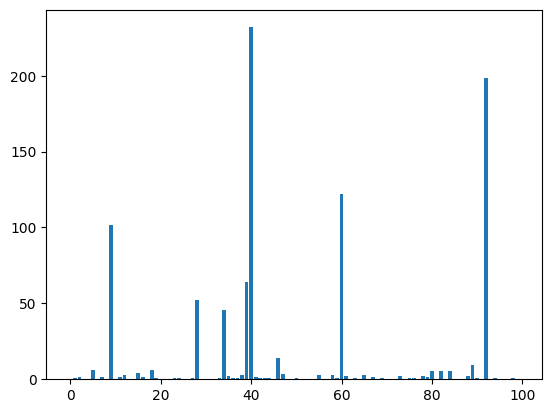

In [ ]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
# feature selection
def select_features(X_train, y_train, X_test):
# configure to select all features
  fs = SelectKBest(score_func=f_regression, k='all')
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1,
random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Mutual Information Feature Selection

applying mutual information feature selection and summarizing the
selected features.

Feature 0: 0.045484
Feature 1: 0.000000
Feature 2: 0.000000
Feature 3: 0.000000
Feature 4: 0.024816
Feature 5: 0.000000
Feature 6: 0.022659
Feature 7: 0.000000
Feature 8: 0.000000
Feature 9: 0.074320
Feature 10: 0.000000
Feature 11: 0.000000
Feature 12: 0.000000
Feature 13: 0.000000
Feature 14: 0.020390
Feature 15: 0.004307
Feature 16: 0.000000
Feature 17: 0.000000
Feature 18: 0.016566
Feature 19: 0.003688
Feature 20: 0.007579
Feature 21: 0.018640
Feature 22: 0.025206
Feature 23: 0.017967
Feature 24: 0.069173
Feature 25: 0.000000
Feature 26: 0.022232
Feature 27: 0.000000
Feature 28: 0.007849
Feature 29: 0.012849
Feature 30: 0.017402
Feature 31: 0.008083
Feature 32: 0.047321
Feature 33: 0.002829
Feature 34: 0.028968
Feature 35: 0.000000
Feature 36: 0.071652
Feature 37: 0.027969
Feature 38: 0.000000
Feature 39: 0.064796
Feature 40: 0.137695
Feature 41: 0.008732
Feature 42: 0.003983
Feature 43: 0.000000
Feature 44: 0.009387
Feature 45: 0.000000
Feature 46: 0.038385
Feature 47: 0.000000
Fe

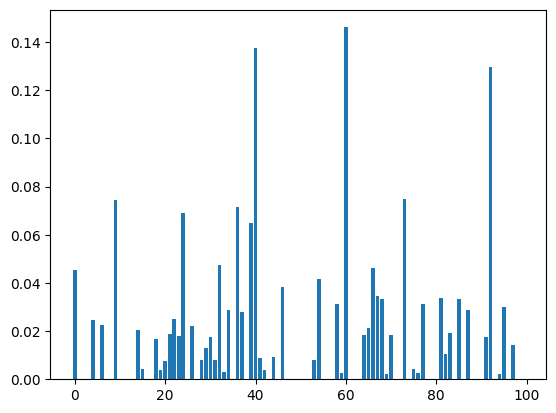

In [ ]:
# example of mutual information feature selection for numerical input data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot
# feature selection
def select_features(X_train, y_train, X_test):
# configure to select all features
  fs = SelectKBest(score_func=mutual_info_regression, k='all')
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1,
random_state=1)
# split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

## Modeling With Selected Features

### Model Built Using All Features

evaluating a model using all features in the dataset.

In [ ]:
# evaluation of a model using all input features
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1,
random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.086


### Model Built Using Correlation Features

evaluating a model using features selected by correlation statistics.

In [ ]:
# evaluation of a model using 10 features chosen with correlation
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# feature selection
def select_features(X_train, y_train, X_test):
# configure to select a subset of features
  fs = SelectKBest(score_func=f_regression, k=10)
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1,
random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 2.740


evaluating a model using most of the features selected by correlation
statistics.

In [ ]:
# evaluation of a model using 88 features chosen with correlation
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# feature selection
def select_features(X_train, y_train, X_test):
# configure to select a subset of features
  fs = SelectKBest(score_func=f_regression, k=88)
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1,
random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.085


### Model Built Using Mutual Information Features

evaluating a model using features selected by mutual information
statistics.

In [ ]:
# evaluation of a model using 88 features chosen with mutual information
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# feature selection
def select_features(X_train, y_train, X_test):
# configure to select a subset of features
  fs = SelectKBest(score_func=mutual_info_regression, k=88)
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1,
random_state=1)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.084


## Tune the Number of Selected Features

grid searching the number of features selected by mutual information.

In [ ]:
# compare different numbers of features selected using mutual information
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# define dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1,
random_state=1)
# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-20, X.shape[1]+1)]
# define the grid search

search = GridSearchCV(pipeline, grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
  print('>%.3f with: %r' % (mean, param))

Best MAE: -0.082
Best Config: {'sel__k': 81}
>-1.100 with: {'sel__k': 80}
>-0.082 with: {'sel__k': 81}
>-0.082 with: {'sel__k': 82}
>-0.082 with: {'sel__k': 83}
>-0.082 with: {'sel__k': 84}
>-0.082 with: {'sel__k': 85}
>-0.082 with: {'sel__k': 86}
>-0.082 with: {'sel__k': 87}
>-0.082 with: {'sel__k': 88}
>-0.083 with: {'sel__k': 89}
>-0.083 with: {'sel__k': 90}
>-0.083 with: {'sel__k': 91}
>-0.083 with: {'sel__k': 92}
>-0.083 with: {'sel__k': 93}
>-0.083 with: {'sel__k': 94}
>-0.083 with: {'sel__k': 95}
>-0.083 with: {'sel__k': 96}
>-0.083 with: {'sel__k': 97}
>-0.083 with: {'sel__k': 98}
>-0.083 with: {'sel__k': 99}
>-0.083 with: {'sel__k': 100}


comparing model performance versus the number of selected features
with mutual information.

>81 -0.082 (0.006)
>82 -0.082 (0.006)
>83 -0.082 (0.006)
>84 -0.082 (0.006)
>85 -0.082 (0.006)
>86 -0.082 (0.006)
>87 -0.082 (0.006)
>88 -0.082 (0.006)
>89 -0.083 (0.006)
>90 -0.083 (0.006)
>91 -0.083 (0.006)
>92 -0.083 (0.006)
>93 -0.083 (0.006)
>94 -0.083 (0.006)
>95 -0.083 (0.006)
>96 -0.083 (0.006)
>97 -0.083 (0.006)
>98 -0.083 (0.006)
>99 -0.083 (0.006)
>100 -0.083 (0.006)


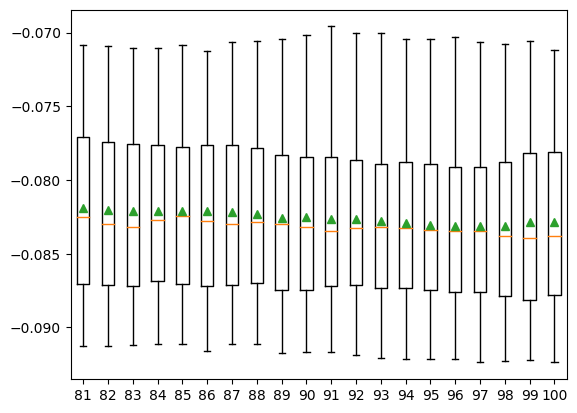

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1,
random_state=1)
# define number of features to evaluate
num_features = [i for i in range(X.shape[1]-19, X.shape[1]+1)]
# enumerate each number of features
results = list()
for k in num_features:
# create pipeline
  model = LinearRegression()
  fs = SelectKBest(score_func=mutual_info_regression, k=k)
  pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
  # evaluate the model
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv,
  n_jobs=-1)
  results.append(scores)
  # summarize the results
  print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()

# Chapter 15 How to Use RFE for Feature Selection

## RFE for Classification

defining and summarizing the synthetic classification dataset.

In [ ]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


evaluating a model for classification with the RFE transform.

In [ ]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.886 (0.034)


making a prediction for classification with the RFE transform.

In [ ]:
# make a prediction with an RFE pipeline
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
pipeline.fit(X, y)
# make a prediction for one example

data = [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057,
-2.48924933, -1.93094078, 3.26130366, 2.05692145]]
yhat = pipeline.predict(data)
print('Predicted Class: %d' % (yhat))

Predicted Class: 1


### RFE for Regression

defining and summarizing the synthetic regression dataset.

In [ ]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


of evaluating a model for regression with an RFE transform.

In [ ]:
# evaluate RFE for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
# define dataset

X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv,
n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -27.291 (2.973)


of making a prediction for regression with an RFE transform.

In [ ]:
# make a regression prediction with an RFE pipeline
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
pipeline.fit(X, y)
# make a prediction for one example
data = [[-2.02220122, 0.31563495, 0.82797464, -0.30620401, 0.16003707, -1.44411381,
0.87616892, -0.50446586, 0.23009474, 0.76201118]]
yhat = pipeline.predict(data)
print('Predicted: %.3f' % (yhat))

Predicted: -84.288


## RFE Hyperparameters

### Explore Number of Features

comparing model performance to the number of features selected
with RFE.

>2 0.721 (0.043)
>3 0.824 (0.035)
>4 0.875 (0.032)
>5 0.890 (0.030)
>6 0.887 (0.027)
>7 0.889 (0.029)
>8 0.888 (0.029)
>9 0.884 (0.030)


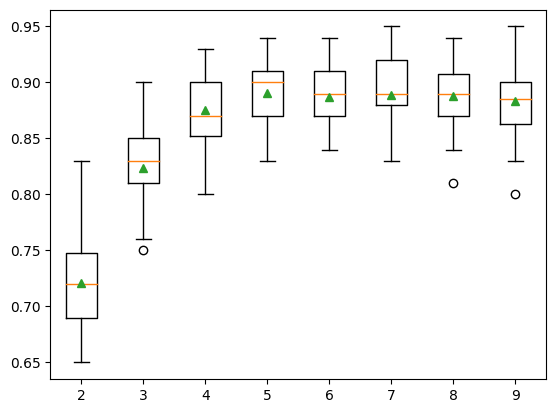

In [ ]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# get the dataset
def get_dataset():
  X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
  random_state=1)
  return X, y
# get a list of models to evaluate
def get_models():
  models = dict()
  for i in range(2, 10):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    model = DecisionTreeClassifier()
    models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
  return models
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### Automatically Select the Number of Features

automatically selecting the number of features selected with RFE.

In [ ]:
# automatically select the number of features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
random_state=1)
# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.886 (0.027)


### Which Features Were Selected

reporting which features were selected by RFE.

In [ ]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE

from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
random_state=1)
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
  print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=False, Rank: 4
Column: 1, Selected=False, Rank: 6
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=False, Rank: 5
Column: 6, Selected=True, Rank: 1
Column: 7, Selected=False, Rank: 3
Column: 8, Selected=True, Rank: 1
Column: 9, Selected=False, Rank: 2


### Explore Base Algorithm

comparing the base algorithm used by RFE.

>lr 0.890 (0.032)
>per 0.845 (0.041)
>cart 0.890 (0.033)
>rf 0.853 (0.036)
>gbm 0.886 (0.031)


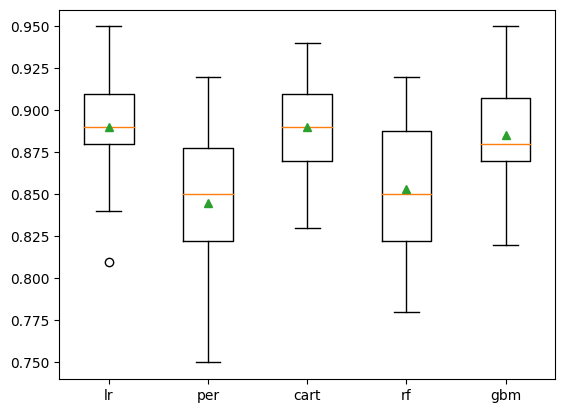

In [ ]:
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# get the dataset
def get_dataset():
  X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
  random_state=1)
  return X, y
# get a list of models to evaluate
def get_models():
  models = dict()
  # lr
  rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
  model = DecisionTreeClassifier()
  models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
  # perceptron
  rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
  model = DecisionTreeClassifier()
  models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
  # cart
  rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
  model = DecisionTreeClassifier()
  models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
  # rf
  rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
  model = DecisionTreeClassifier()
  models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
  # gbm
  rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
  model = DecisionTreeClassifier()
  models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
  return models
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Chapter 16 How to Use Feature Importance

## Test Datasets

defining and summarizing the synthetic classification dataset.

In [ ]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


### Regression Dataset

In [ ]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


## Coefficients as Feature Importance

## Linear Regression Feature Importance

calculating feature importance with linear regression.

Feature: 0, Score: 0.00000
Feature: 1, Score: 12.44483
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: 93.32225
Feature: 5, Score: 86.50811
Feature: 6, Score: 26.74607
Feature: 7, Score: 3.28535
Feature: 8, Score: -0.00000
Feature: 9, Score: 0.00000


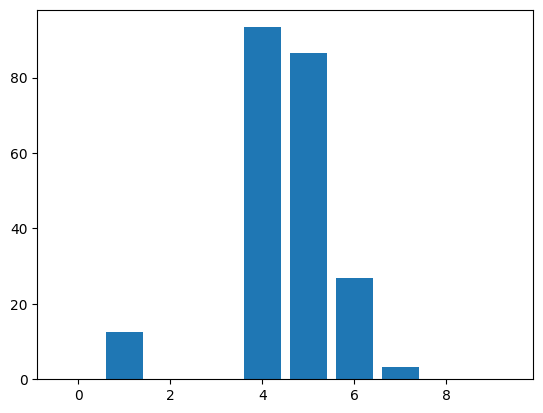

In [ ]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Logistic Regression Feature Importance

of calculating feature importance with logistic regression.

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


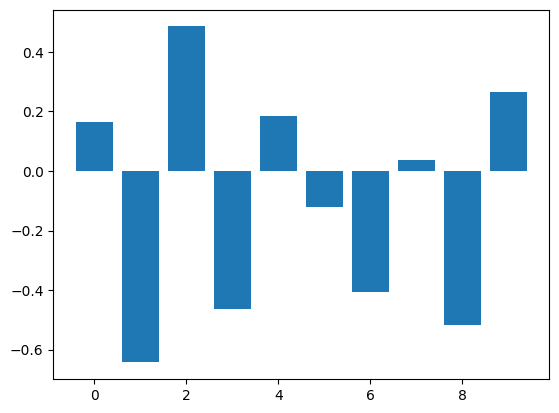

In [ ]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### CART Feature Importance

calculating feature importance with CART for regression.

Feature: 0, Score: 0.00242
Feature: 1, Score: 0.00427
Feature: 2, Score: 0.00174
Feature: 3, Score: 0.00148
Feature: 4, Score: 0.51765
Feature: 5, Score: 0.43818
Feature: 6, Score: 0.02717
Feature: 7, Score: 0.00323
Feature: 8, Score: 0.00267
Feature: 9, Score: 0.00118


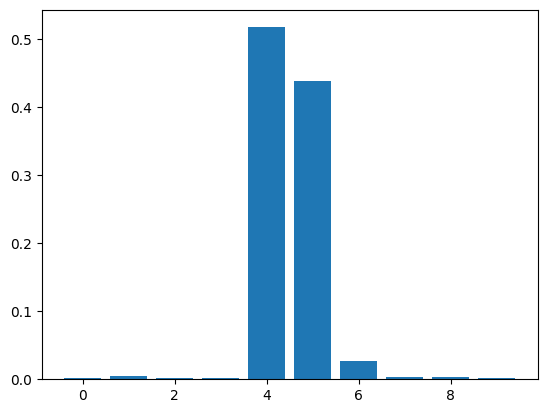

In [ ]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

calculating feature importance with CART for classification.

Feature: 0, Score: 0.01187
Feature: 1, Score: 0.01633
Feature: 2, Score: 0.18210
Feature: 3, Score: 0.30886
Feature: 4, Score: 0.08913
Feature: 5, Score: 0.01793
Feature: 6, Score: 0.17769
Feature: 7, Score: 0.03198
Feature: 8, Score: 0.12435
Feature: 9, Score: 0.03974


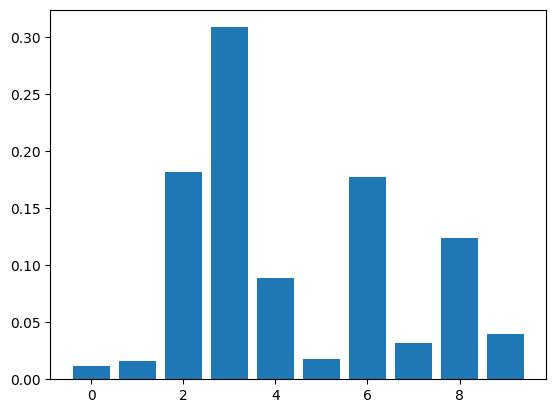

In [ ]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Random Forest Feature Importance

calculating feature importance with Random Forest for regression.

Feature: 0, Score: 0.00288
Feature: 1, Score: 0.00520
Feature: 2, Score: 0.00280
Feature: 3, Score: 0.00273
Feature: 4, Score: 0.53050
Feature: 5, Score: 0.42091
Feature: 6, Score: 0.02619
Feature: 7, Score: 0.00284
Feature: 8, Score: 0.00318
Feature: 9, Score: 0.00277


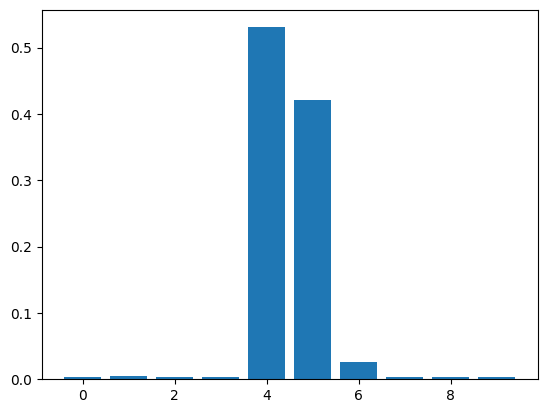

In [ ]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

calculating feature importance with Random Forest for classification.

Feature: 0, Score: 0.06800
Feature: 1, Score: 0.11147
Feature: 2, Score: 0.16163
Feature: 3, Score: 0.19354
Feature: 4, Score: 0.08774
Feature: 5, Score: 0.10635
Feature: 6, Score: 0.09774
Feature: 7, Score: 0.04254
Feature: 8, Score: 0.08986
Feature: 9, Score: 0.04115


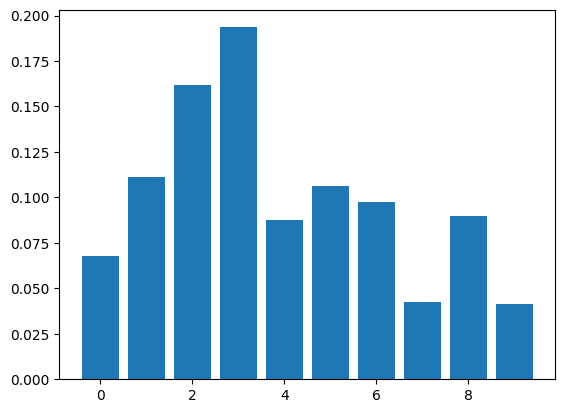

In [ ]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Permutation Feature Importance

### Permutation Feature Importance for Regression

calculating permutation feature importance for regression.

Feature: 0, Score: 142.00517
Feature: 1, Score: 326.08179
Feature: 2, Score: 130.64234
Feature: 3, Score: 26.39891
Feature: 4, Score: 9752.28125
Feature: 5, Score: 7930.65337
Feature: 6, Score: 842.94475
Feature: 7, Score: 128.43095
Feature: 8, Score: 108.94439
Feature: 9, Score: 112.82602


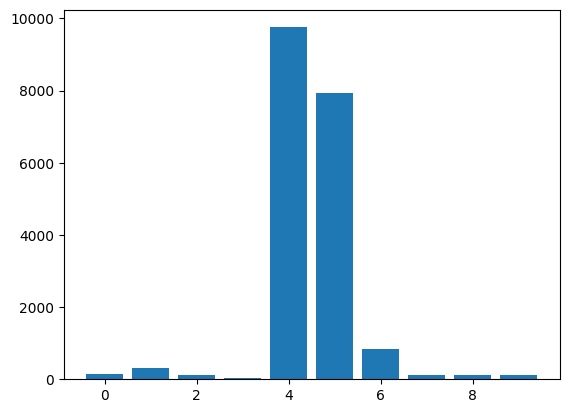

In [ ]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Permutation Feature Importance for Classification

calculating permutation feature importance for classification.

Feature: 0, Score: 0.04780
Feature: 1, Score: 0.06300
Feature: 2, Score: 0.05240
Feature: 3, Score: 0.09400
Feature: 4, Score: 0.05060
Feature: 5, Score: 0.06040
Feature: 6, Score: 0.07420
Feature: 7, Score: 0.05560
Feature: 8, Score: 0.05460
Feature: 9, Score: 0.03340


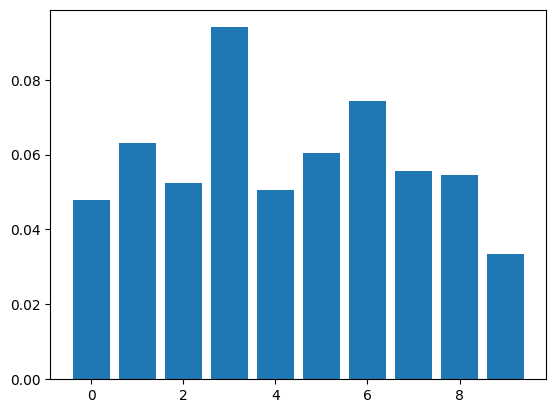

In [ ]:
# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
random_state=1)
# define the model
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Feature Selection with Importance

evaluating a model with all selected features.

In [ ]:
# evaluation of a model using all features
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
# define the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.55


evaluating a model with feature selection performed using feature
importance.

In [ ]:
# evaluation of a model using 5 features chosen with random forest importance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# feature selection
def select_features(X_train, y_train, X_test):
# configure to select a subset of features
  fs = SelectFromModel(RandomForestClassifier(n_estimators=1000), max_features=5)
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
# define the dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 84.55


# Data Transforms

# Chapter 17 How to Scale Numerical Data

## Numerical Data Scaling Methods

### Data Normalization

normalizing values in a dataset.

In [ ]:
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
data = asarray([[100, 0.001],
[8, 0.05],
[50, 0.005],
[88, 0.07],
[4, 0.1]])
print(data)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


### Data Standardization

standardizing values in a dataset.

In [ ]:
# example of a standardization
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define data
data = asarray([[100, 0.001],
[8, 0.05],
[50, 0.005],
[88, 0.07],
[4, 0.1]])
print(data)
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]


## Diabetes Dataset

loading and summarizing the diabetes dataset.

(768, 9)
                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000

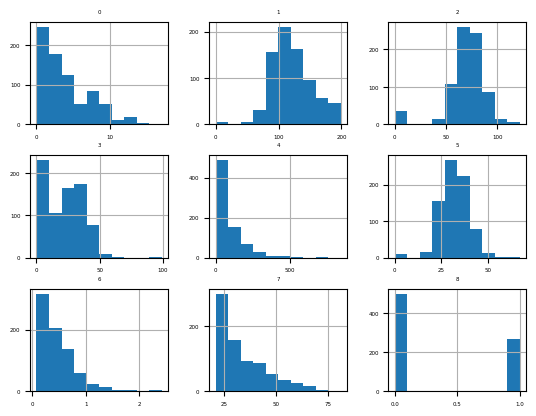

In [ ]:
# load and summarize the diabetes dataset
from pandas import read_csv
from matplotlib import pyplot
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

evaluating model performance on the diabetes dataset.

In [ ]:
# evaluate knn on the raw diabetes dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.717 (0.040)


## MinMaxScaler Transform

reviewing the data after a MinMaxScaler transform.

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.226180    0.607510    0.566438    0.207439    0.094326    0.476790   
std      0.198210    0.160666    0.158654    0.161134    0.136222    0.117499   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.058824    0.497487    0.508197    0.000000    0.000000    0.406855   
50%      0.176471    0.587940    0.590164    0.232323    0.036052    0.476900   
75%      0.352941    0.704774    0.655738    0.323232    0.150414    0.545455   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7  
count  768.000000  768.000000  
mean     0.168179    0.204015  
std      0.141473    0.196004  
min      0.000000    0.000000  
25%      0.070773    0.050000  
50%      0.125747    0.133333  
75%      0.234095    0.333333  
max      1.000

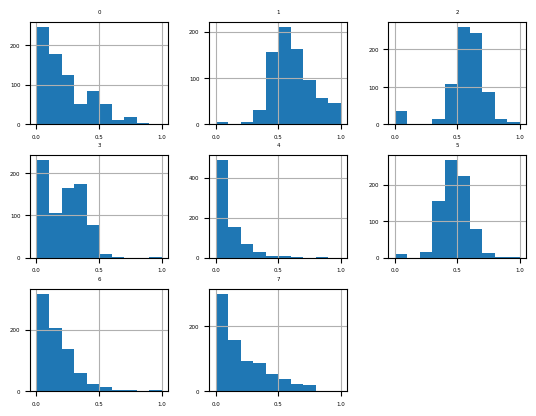

In [ ]:
# visualize a minmax scaler transform of the diabetes dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())

# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

of evaluating model performance after a MinMaxScaler transform.

In [ ]:
# evaluate knn on the diabetes dataset with minmax scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = MinMaxScaler()

model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.739 (0.053)


## StandardScaler Transform

reviewing the data after a StandardScaler transform.

                  0             1             2             3             4  \
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02   
mean  -6.476301e-17 -9.251859e-18  1.503427e-17  1.006140e-16 -3.006854e-17   
std    1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00   
min   -1.141852e+00 -3.783654e+00 -3.572597e+00 -1.288212e+00 -6.928906e-01   
25%   -8.448851e-01 -6.852363e-01 -3.673367e-01 -1.288212e+00 -6.928906e-01   
50%   -2.509521e-01 -1.218877e-01  1.496408e-01  1.545332e-01 -4.280622e-01   
75%    6.399473e-01  6.057709e-01  5.632228e-01  7.190857e-01  4.120079e-01   
max    3.906578e+00  2.444478e+00  2.734528e+00  4.921866e+00  6.652839e+00   

                  5             6             7  
count  7.680000e+02  7.680000e+02  7.680000e+02  
mean   2.590520e-16  2.451743e-16  1.931325e-16  
std    1.000652e+00  1.000652e+00  1.000652e+00  
min   -4.060474e+00 -1.189553e+00 -1.041549e+00  
25%   -5.955785e-01 -6.889685e-01 -7.8

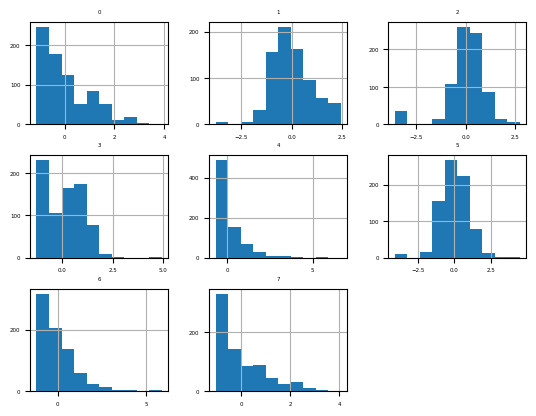

In [ ]:
# visualize a standard scaler transform of the diabetes dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]

# perform a robust scaler transform of the dataset
trans = StandardScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

evaluating model performance after a StandardScaler transform.

In [ ]:
# evaluate knn on the diabetes dataset with standard scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = StandardScaler()

model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.741 (0.050)


# Chapter 18 How to Scale Data With Outliers

## Diabetes Dataset

loading and summarizing the diabetes dataset.

(768, 9)
                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000

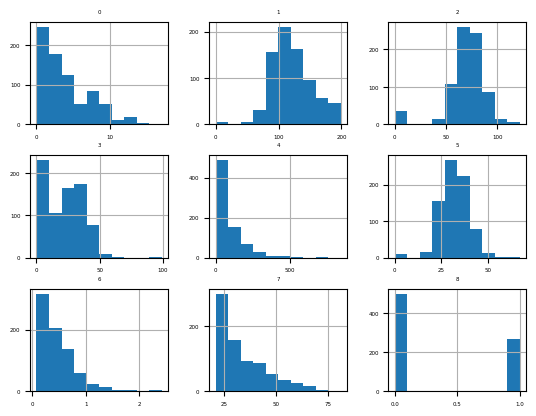

In [ ]:
# load and summarize the diabetes dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

evaluating model performance on the diabetes dataset.

In [ ]:
# evaluate knn on the raw diabetes dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.717 (0.040)


## IQR Robust Scaler Transform

of reviewing the data after a RobustScaler transform.

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.169010    0.094413   -0.160807   -0.076986    0.387422   -0.000798   
std      0.673916    0.775094    1.075323    0.498507    0.905650    0.847759   
min     -0.600000   -2.836364   -4.000000   -0.718750   -0.239686   -3.440860   
25%     -0.400000   -0.436364   -0.555556   -0.718750   -0.239686   -0.505376   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.600000    0.563636    0.444444    0.281250    0.760314    0.494624   
max      2.800000    1.987879    2.777778    2.375000    6.408644    3.774194   

                6           7  
count  768.000000  768.000000  
mean     0.259807    0.249464  
std      0.866219    0.691778  
min     -0.769935   -0.470588  
25%     -0.336601   -0.294118  
50%      0.000000    0.000000  
75%      0.663399    0.705882  
max      5.352

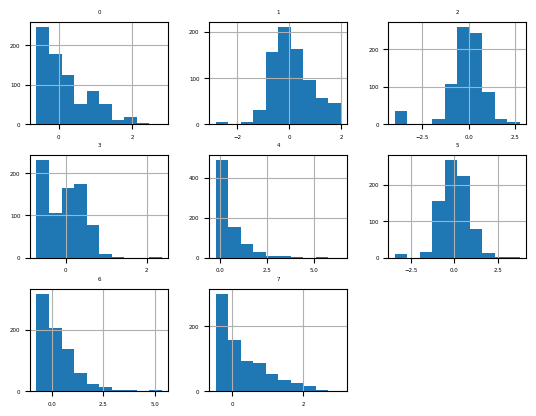

In [ ]:
# visualize a robust scaler transform of the diabetes dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import RobustScaler
from matplotlib import pyplot
# load dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a robust scaler transform of the dataset
trans = RobustScaler()
data = trans.fit_transform(data)

# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

evaluating model performance after a RobustScaler transform.

In [ ]:
# evaluate knn on the diabetes dataset with robust scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = RobustScaler()

model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.734 (0.044)


## Explore Robust Scaler Range

comparing model performance with different ranges for the
RobustScaler transform.

>1 0.734 (0.054)
>5 0.736 (0.051)
>10 0.739 (0.047)
>15 0.740 (0.045)
>20 0.734 (0.050)
>25 0.734 (0.044)
>30 0.735 (0.042)


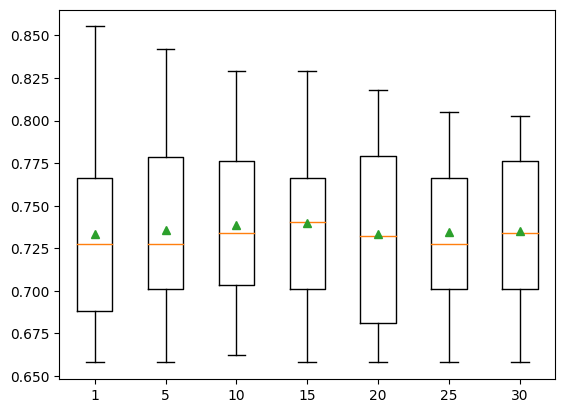

In [ ]:
# explore the scaling range of the robust scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# get the dataset
def get_dataset():
# load dataset
  dataset = read_csv('pima-indians-diabetes.csv', header=None)
  data = dataset.values

  # separate into input and output columns
  X, y = data[:, :-1], data[:, -1]
  # ensure inputs are floats and output is an integer label
  X = X.astype('float32')
  y = LabelEncoder().fit_transform(y.astype('str'))
  return X, y
# get a list of models to evaluate
def get_models():
  models = dict()
  for value in [1, 5, 10, 15, 20, 25, 30]:
  # define the pipeline
    trans = RobustScaler(quantile_range=(value, 100-value))
    model = KNeighborsClassifier()
    models[str(value)] = Pipeline(steps=[('t', trans), ('m', model)])
  return models
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Chapter 19 How to Encode Categorical Data

## Encoding Categorical Data

### Ordinal Encoding

demonstrating an ordinal encoding of color categories.

In [ ]:
# example of a ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data)
print(result)

[['red']
 ['green']
 ['blue']]
[[2.]
 [1.]
 [0.]]


### One Hot Encoding

demonstrating a one hot encoding of color categories.

In [ ]:
# example of a one hot encoding
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)
# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data
onehot = encoder.fit_transform(data)
print(onehot)

[['red']
 ['green']
 ['blue']]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Dummy Variable Encoding

demonstrating a dummy variable encoding of color categories.

In [ ]:
# example of a dummy variable encoding
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder
# define data
data = asarray([['red'], ['green'], ['blue']])
print(data)
# define one hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
# transform data
onehot = encoder.fit_transform(data)
print(onehot)

[['red']
 ['green']
 ['blue']]
[[0. 1.]
 [1. 0.]
 [0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Breast Cancer Dataset

loading the dataset from file and summarizing the shape.

In [ ]:
# load and summarize the dataset
from pandas import read_csv
# load the dataset
dataset = read_csv('breast-cancer.csv', header=None)
# retrieve the array of data
data = dataset.values
# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)
# summarize
print('Input', X.shape)
print('Output', y.shape)

Input (286, 9)
Output (286,)


## OrdinalEncoder Transform

ordinal encoding of the breast cancer dataset.

In [ ]:
# ordinal encode the breast cancer dataset
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
# load the dataset
dataset = read_csv('breast-cancer.csv', header=None)
# retrieve the array of data
data = dataset.values
# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)
# ordinal encode input variables
ordinal_encoder = OrdinalEncoder()
X = ordinal_encoder.fit_transform(X)
# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# summarize the transformed data
print('Input', X.shape)
print(X[:5, :])
print('Output', y.shape)
print(y[:5])

Input (286, 9)
[[2. 2. 2. 0. 1. 2. 1. 2. 0.]
 [3. 0. 2. 0. 0. 0. 1. 0. 0.]
 [3. 0. 6. 0. 0. 1. 0. 1. 0.]
 [2. 2. 6. 0. 1. 2. 1. 1. 1.]
 [2. 2. 5. 4. 1. 1. 0. 4. 0.]]
Output (286,)
[1 0 1 0 1]


evaluating a model on the breast cancer dataset with an ordinal
encoding.

In [ ]:
# evaluate logistic regression on the breast cancer dataset with an ordinal encoding
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
# load the dataset
dataset = read_csv('breast-cancer.csv', header=None)
# retrieve the array of data
data = dataset.values
# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# ordinal encode input variables
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_train)
X_train = ordinal_encoder.transform(X_train)
X_test = ordinal_encoder.transform(X_test)
# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
# define the model
model = LogisticRegression()
# fit on the training set

model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.79


## OneHotEncoder Transform

hot encoding of the breast cancer dataset.

In [ ]:
# one-hot encode the breast cancer dataset
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# load the dataset
dataset = read_csv('breast-cancer.csv', header=None)
# retrieve the array of data

data = dataset.values
# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)
# one hot encode input variables
onehot_encoder = OneHotEncoder(sparse=False)
X = onehot_encoder.fit_transform(X)
# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# summarize the transformed data
print('Input', X.shape)
print(X[:5, :])

Input (286, 43)
[[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


evaluating a model on the breast cancer dataset with an one hot
encoding.

In [ ]:
# evaluate logistic regression on the breast cancer dataset with a one-hot encoding
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score
# load the dataset
dataset = read_csv('breast-cancer.csv', header=None)
# retrieve the array of data
data = dataset.values
# separate into input and output columns
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# one-hot encode input variables
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)
# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
# define the model
model = LogisticRegression()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 70.53


# Chapter 20 How to Make Distributions More Gaussian

## Power Transforms

effect of the power transform on a skewed data distribution.

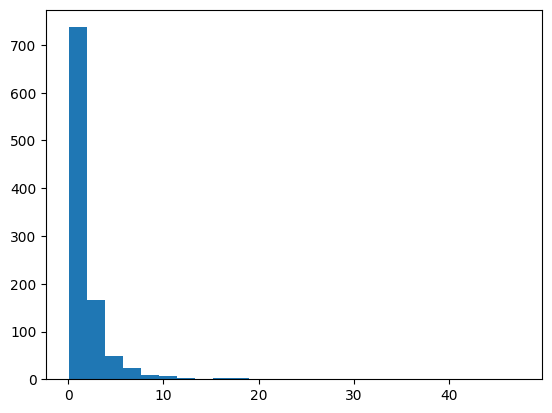

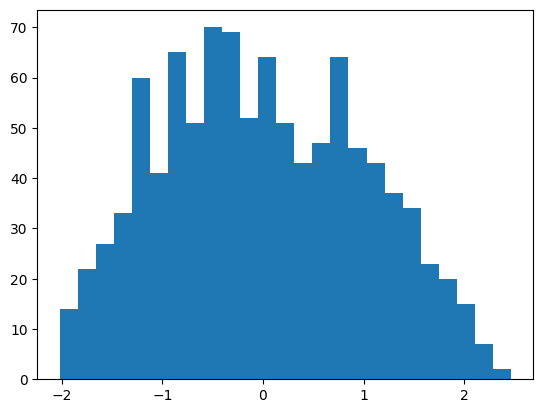

In [ ]:
# demonstration of the power transform on data with a skew
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot
# generate gaussian data sample
data = randn(1000)
# add a skew to the data distribution
data = exp(data)
# histogram of the raw data with a skew
pyplot.hist(data, bins=25)
pyplot.show()
# reshape data to have rows and columns
data = data.reshape((len(data),1))
# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(data)

# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()

loading and summarizing the sonar dataset.

(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

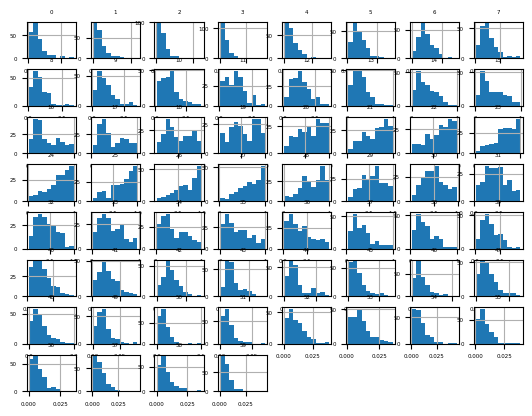

In [ ]:
# load and summarize the sonar dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('sonar.csv', header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

evaluating model performance on the sonar dataset.

In [ ]:
# evaluate knn on the raw sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


## Box-Cox Transform

applying the Box-Cox transform in a way that results in an error.

In [ ]:
# visualize a box-cox transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot
# Load dataset


dataset = read_csv('sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a box-cox transform of the dataset
pt = PowerTransformer(method='box-cox')
# NOTE: we expect this to cause an error!!!
data = pt.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

ValueError: ignored

sonar dataset after applying a Box-Cox transform.

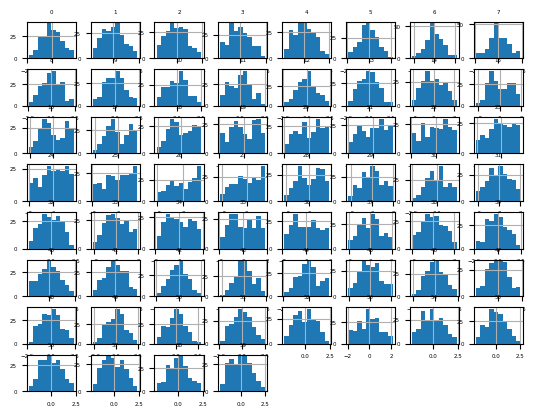

In [ ]:
# visualize a box-cox transform of the scaled sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# Load dataset
dataset = read_csv('sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a box-cox transform of the dataset
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data = pipeline.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables

fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

model on the sonar dataset after applying a Box-Cox
transform.

In [ ]:
# evaluate knn on the box-cox sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler),('p', power), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.811 (0.085)


## Yeo-Johnson Transform

sonar dataset after applying a Yeo-Johnson transform.

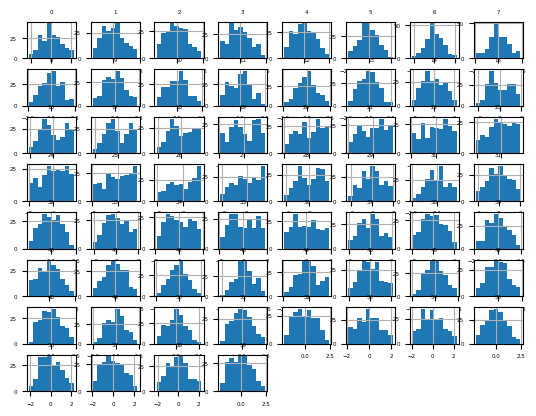

In [ ]:
# visualize a yeo-johnson transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot
# Load dataset
dataset = read_csv('sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a yeo-johnson transform of the dataset
pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

model on the sonar dataset after applying a Yeo-Johnson
transform.

In [ ]:
# evaluate knn on the yeo-johnson sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()

pipeline = Pipeline(steps=[('p', power), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.808 (0.082)


model on the sonar dataset after applying a
StandardScaler and Yeo-Johnson transforms.

In [ ]:
# evaluate knn on the yeo-johnson standardized sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
scaler = StandardScaler()
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler), ('p', power), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.816 (0.077)


# Chapter 21 How to Change Numerical Data Distributions

## Quantile Transforms

effect of the quantile transform on a skewed data distribution.

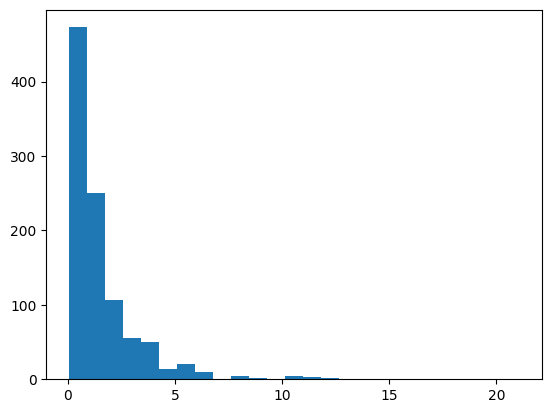

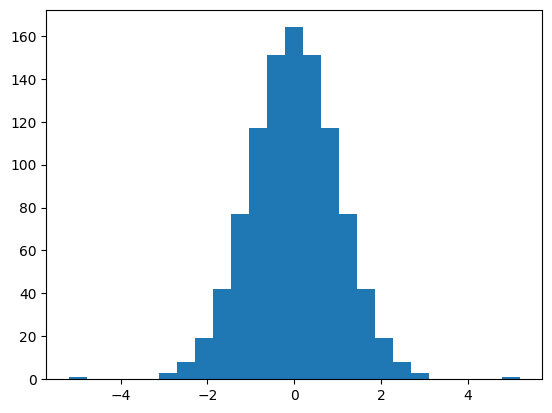

In [ ]:
# demonstration of the quantile transform
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot

# generate gaussian data sample
data = randn(1000)
# add a skew to the data distribution
data = exp(data)
# histogram of the raw data with a skew
pyplot.hist(data, bins=25)
pyplot.show()
# reshape data to have rows and columns
data = data.reshape((len(data),1))
# quantile transform the raw data
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(data)
# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()

## Sonar Dataset

loading and summarizing the sonar dataset.

(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

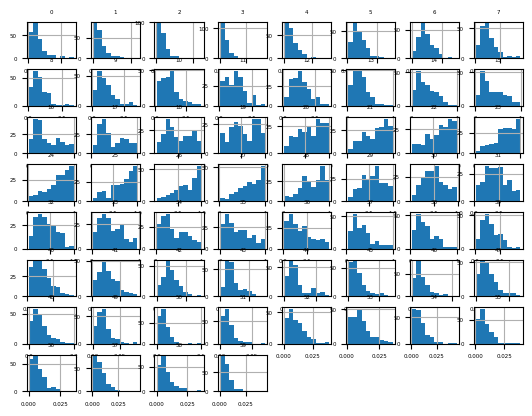

In [ ]:
# load and summarize the sonar dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('sonar.csv', header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable

print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

evaluating model performance on the sonar dataset.

In [ ]:
# evaluate knn on the raw sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


## Normal Quantile Transform

sonar dataset after applying a normal quantile
transform.

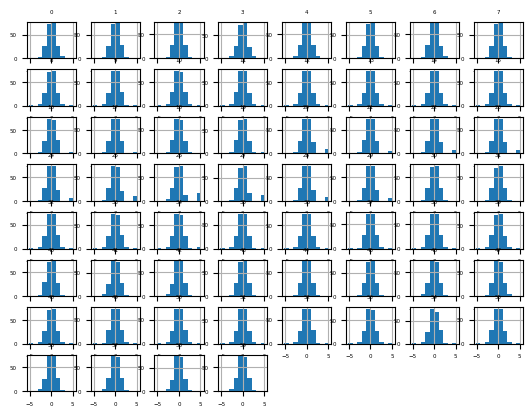

In [ ]:
# visualize a normal quantile transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot
# load dataset
dataset = read_csv('sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a normal quantile transform of the dataset
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
data = trans.fit_transform(data)
# convert the array back to a dataframe

dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

evaluating a model on the sonar dataset after applying a normal
quantile transform.

In [ ]:
# evaluate knn on the sonar dataset with normal quantile transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.817 (0.087)


## Uniform Quantile Transform

summarizing the sonar dataset after applying a uniform quantile
transform.

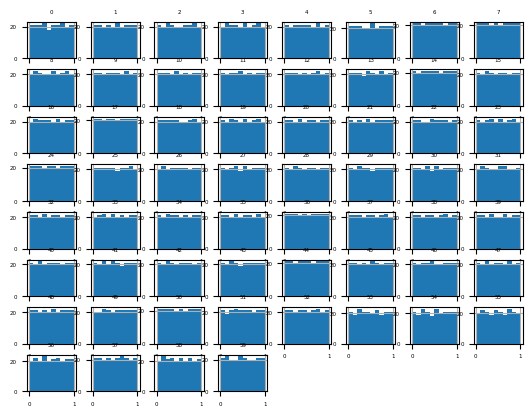

In [ ]:
# visualize a uniform quantile transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot
# load dataset
dataset = read_csv('sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a uniform quantile transform of the dataset
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

evaluating a model on the sonar dataset after applying a uniform
quantile transform.

In [ ]:
# evaluate knn on the sonar dataset with uniform quantile transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform')

model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.845 (0.074)


comparing the number of partitions for the dataset in a uniform
quantile transform.

>1 0.466 (0.016)
>2 0.813 (0.085)
>3 0.840 (0.080)
>4 0.854 (0.075)
>5 0.848 (0.072)
>6 0.851 (0.071)
>7 0.845 (0.071)
>8 0.848 (0.066)
>9 0.848 (0.071)
>10 0.843 (0.074)
>11 0.838 (0.069)
>12 0.838 (0.069)
>13 0.846 (0.071)
>14 0.842 (0.071)
>15 0.845 (0.068)
>16 0.841 (0.074)
>17 0.846 (0.071)
>18 0.842 (0.075)
>19 0.840 (0.075)
>20 0.838 (0.076)
>21 0.843 (0.071)
>22 0.845 (0.073)
>23 0.843 (0.068)
>24 0.845 (0.072)
>25 0.840 (0.077)
>26 0.843 (0.072)
>27 0.842 (0.073)
>28 0.840 (0.076)
>29 0.845 (0.072)
>30 0.840 (0.075)
>31 0.838 (0.076)
>32 0.842 (0.075)
>33 0.843 (0.074)
>34 0.843 (0.075)
>35 0.842 (0.075)
>36 0.843 (0.073)
>37 0.842 (0.075)
>38 0.843 (0.075)
>39 0.840 (0.076)
>40 0.845 (0.074)
>41 0.841 (0.072)
>42 0.842 (0.075)
>43 0.842 (0.074)
>44 0.843 (0.074)
>45 0.840 (0.076)
>46 0.842 (0.075)
>47 0.845 (0.072)
>48 0.842 (0.073)
>49 0.840 (0.073)
>50 0.842 (0.072)
>51 0.842 (0.075)
>52 0.845 (0.071)
>53 0.843 (0.075)
>54 0.845 (0.074)
>55 0.838 (0.076)
>56 0.846 (0.073)
>

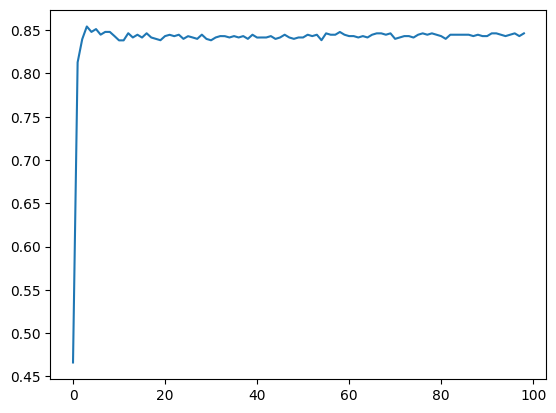

In [ ]:
# explore number of quantiles on classification accuracy
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# get the dataset
def get_dataset(filename):
# load dataset
  dataset = read_csv(filename, header=None)
  data = dataset.values
  # separate into input and output columns
  X, y = data[:, :-1], data[:, -1]
  # ensure inputs are floats and output is an integer label
  X = X.astype('float32')
  y = LabelEncoder().fit_transform(y.astype('str'))
  return X, y
# get a list of models to evaluate

def get_models():
  models = dict()
  for i in range(1,100):
  # define the pipeline
    trans = QuantileTransformer(n_quantiles=i, output_distribution='uniform')
    model = KNeighborsClassifier()
    models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)])
  return models
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores
# define dataset
X, y = get_dataset('sonar.csv')
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results = list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(mean(scores))
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.plot(results)
pyplot.show()

# Chapter 22 How to Transform Numerical to Categorical Data

## Discretization Transforms

effect of the discretization transform on a Gaussian data
distribution.

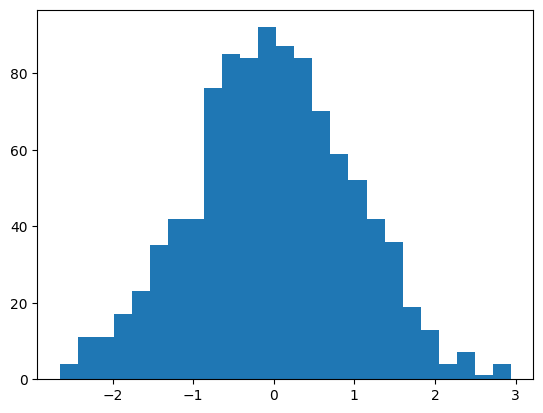

[[5.]
 [2.]
 [1.]
 [1.]
 [9.]
 [4.]
 [4.]
 [6.]
 [4.]
 [0.]]


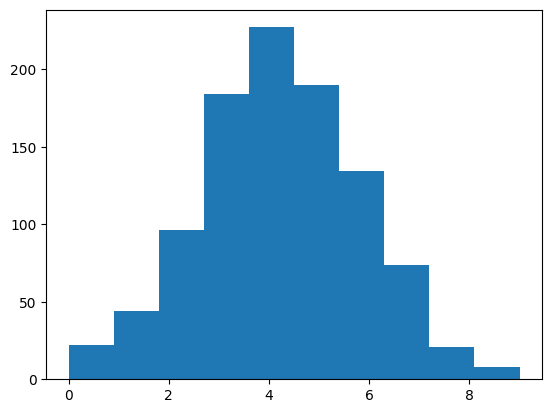

In [ ]:
# demonstration of the discretization transform
from numpy.random import randn
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot
# generate gaussian data sample
data = randn(1000)
# histogram of the raw data
pyplot.hist(data, bins=25)
pyplot.show()
# reshape data to have rows and columns
data = data.reshape((len(data),1))
# discretization transform the raw data
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data_trans = kbins.fit_transform(data)
# summarize first few rows
print(data_trans[:10, :])
# histogram of the transformed data
pyplot.hist(data_trans, bins=10)
pyplot.show()

## Sonar Dataset

loading and summarizing the sonar dataset.

(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

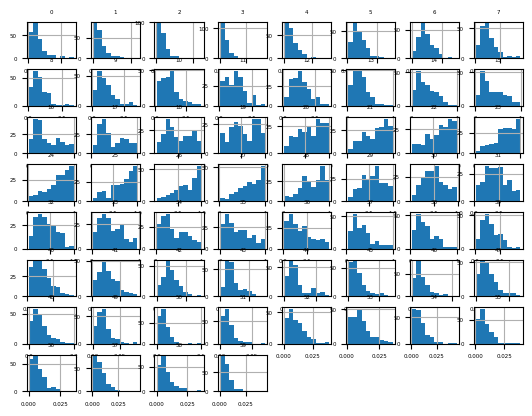

In [ ]:
# load and summarize the sonar dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('sonar.csv', header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]

# show the plot
pyplot.show()

evaluating model performance on the sonar dataset.

In [ ]:
# evaluate knn on the raw sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


## Uniform Discretization Transform

sonar dataset after applying a uniform discretization
transform.

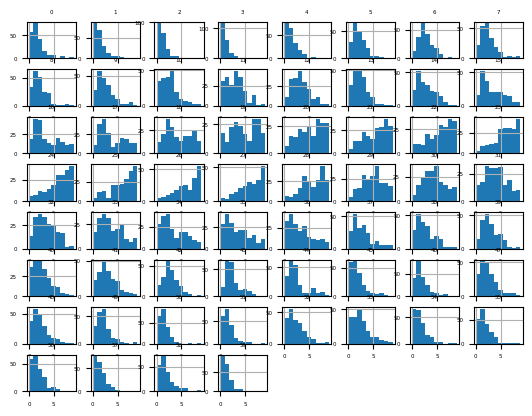

In [ ]:
# visualize a uniform ordinal discretization transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot
# load dataset
dataset = read_csv('sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a uniform discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

evaluating a model on the sonar dataset after applying a uniform
discretization transform.

In [ ]:
# evaluate knn on the sonar dataset with uniform ordinal discretization transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.829 (0.079)


## k-Means Discretization Transform


sonar dataset after applying a k-Means discretization
transform.

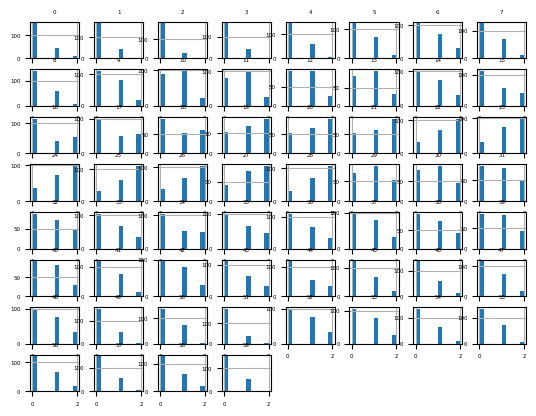

In [ ]:
# visualize a k-means ordinal discretization transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot
# load dataset
dataset = read_csv('sonar.csv', header=None)

# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a k-means discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

evaluating a model on the sonar dataset after applying a k-Means
discretization transform.

In [ ]:
# evaluate knn on the sonar dataset with k-means ordinal discretization transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.821 (0.089)


## Quantile Discretization Transform

the sonar dataset after applying a quantile discretization
transform.

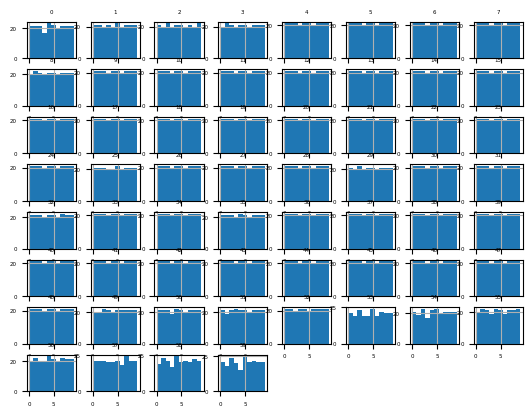

In [ ]:
# visualize a quantile ordinal discretization transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot
# load dataset
dataset = read_csv('sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a quantile discretization transform of the dataset
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

evaluating a model on the sonar dataset after applying a quantile
discretization transform.

In [ ]:
# evaluate knn on the sonar dataset with quantile ordinal discretization transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.840 (0.072)


comparing the number of bins for the dataset discretization transform.

>2 0.822 (0.077)
>3 0.878 (0.053)
>4 0.836 (0.083)
>5 0.840 (0.069)
>6 0.843 (0.069)
>7 0.854 (0.071)
>8 0.838 (0.077)
>9 0.841 (0.069)
>10 0.840 (0.072)


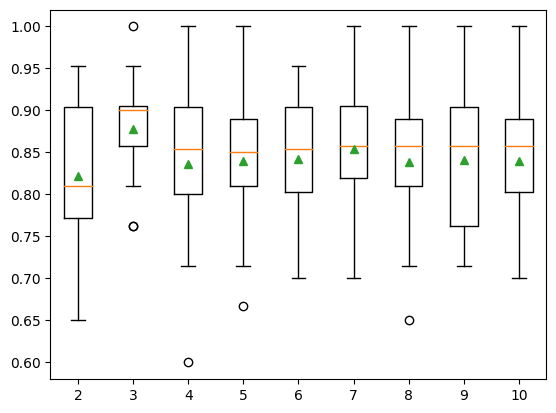

In [ ]:
# explore number of discrete bins on classification accuracy
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# get the dataset
def get_dataset():
# load dataset
  dataset = read_csv('sonar.csv', header=None)
  data = dataset.values
  # separate into input and output columns
  X, y = data[:, :-1], data[:, -1]
  # ensure inputs are floats and output is an integer label
  X = X.astype('float32')
  y = LabelEncoder().fit_transform(y.astype('str'))
  return X, y
# get a list of models to evaluate

def get_models():
  models = dict()
  for i in range(2,11):
  # define the pipeline
    trans = KBinsDiscretizer(n_bins=i, encode='ordinal', strategy='quantile')
    model = KNeighborsClassifier()
    models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)])
  return models
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores
# get the dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Chapter 23 How to Derive New Input Variables

# Polynomial Feature Transform

demonstrating the effect of the polynomial transform.

In [ ]:
# demonstrate the types of features created
from numpy import asarray
from sklearn.preprocessing import PolynomialFeatures
# define the dataset
data = asarray([[2,3],[2,3],[2,3]])
print(data)
# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=2)
data = trans.fit_transform(data)
print(data)

[[2 3]
 [2 3]
 [2 3]]
[[1. 2. 3. 4. 6. 9.]
 [1. 2. 3. 4. 6. 9.]
 [1. 2. 3. 4. 6. 9.]]


## Sonar Dataset

loading and summarizing the sonar dataset.

(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

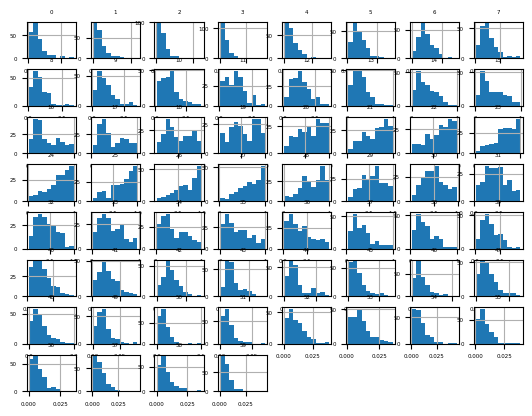

In [ ]:
# load and summarize the sonar dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('sonar.csv', header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

evaluating model performance on the sonar dataset.

In [ ]:
# evaluate knn on the raw sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


## Polynomial Feature Transform Example

sonar dataset after applying a polynomial transform.

In [ ]:
# visualize a polynomial features transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PolynomialFeatures
# load dataset
dataset = read_csv('sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a polynomial features transform of the dataset
trans = PolynomialFeatures(degree=3)
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.shape)

(208, 39711)


evaluating a model on the sonar dataset after applying a polynomial
transform.

In [ ]:
# evaluate knn on the sonar dataset with polynomial features transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = PolynomialFeatures(degree=3)
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.800 (0.077)


## Effect of Polynomial Degree

comparing the number of features created when varying degree in the
polynomial transform.

Degree: 1, Features: 61
Degree: 2, Features: 1891
Degree: 3, Features: 39711
Degree: 4, Features: 635376
Degree: 5, Features: 8259888


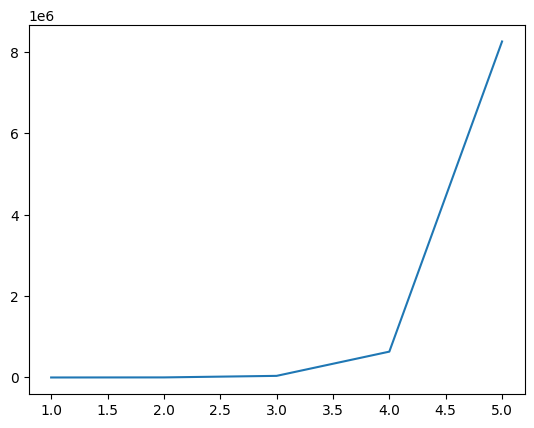

In [ ]:
# compare the effect of the degree on the number of created features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot
# get the dataset
def get_dataset(filename):
# load dataset
  dataset = read_csv(filename, header=None)
  data = dataset.values
  # separate into input and output columns
  X, y = data[:, :-1], data[:, -1]
  # ensure inputs are floats and output is an integer label
  X = X.astype('float32')
  y = LabelEncoder().fit_transform(y.astype('str'))
  return X, y
# define dataset
X, y = get_dataset('sonar.csv')
# calculate change in number of features
num_features = list()
degress = [i for i in range(1, 6)]
for d in degress:
# create transform
  trans = PolynomialFeatures(degree=d)
  # fit and transform
  data = trans.fit_transform(X)
  # record number of features
  num_features.append(data.shape[1])
  # summarize
  print('Degree: %d, Features: %d' % (d, data.shape[1]))
# plot degree vs number of features
pyplot.plot(degress, num_features)
pyplot.show()

comparing model performance with changes to the degree in the
polynomial transform.

In [ ]:
# explore the effect of degree on accuracy for the polynomial features transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset(filename):
# load dataset
  dataset = read_csv(filename, header=None)
  data = dataset.values
  # separate into input and output columns
  X, y = data[:, :-1], data[:, -1]
  # ensure inputs are floats and output is an integer label
  X = X.astype('float32')
  y = LabelEncoder().fit_transform(y.astype('str'))
  return X, y
# get a list of models to evaluate
def get_models():
  models = dict()
  for d in range(1,5):
  # define the pipeline
    trans = PolynomialFeatures(degree=d)
    model = KNeighborsClassifier()
    models[str(d)] = Pipeline(steps=[('t', trans), ('m', model)])
  return models
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores
# define dataset
X, y = get_dataset('sonar.csv')
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.797 (0.073)
>2 0.793 (0.085)
>3 0.800 (0.077)


# Chapter 24 How to Transform Numerical and Categorical Data

## Challenge of Transforming Different Data Types

## Data Preparation for the Abalone Regression Dataset

loading and summarizing the abalone dataset.

In [ ]:
# load the dataset
from pandas import read_csv
# load dataset
dataframe = read_csv('abalone.csv', header=None)
# split into inputs and outputs
last_ix = len(dataframe.columns) - 1
X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
print(X.shape, y.shape)

(4177, 8) (4177,)


evaluating the model on the abalone dataset with different transforms
based on data types.

In [ ]:
# example of using the ColumnTransformer for the Abalone dataset
from numpy import mean

from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
# load dataset
dataframe = read_csv('abalone.csv', header=None)
# split into inputs and outputs
last_ix = len(dataframe.columns) - 1
X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]
print(X.shape, y.shape)
# determine categorical and numerical features
numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns
# define the data preparation for the columns
t = [('cat', OneHotEncoder(), categorical_ix), ('num', MinMaxScaler(), numerical_ix)]
col_transform = ColumnTransformer(transformers=t)
# define the model
model = SVR(kernel='rbf',gamma='scale',C=100)
# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep',col_transform), ('m', model)])
# define the model cross-validation configuration
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# evaluate the pipeline using cross validation and calculate MAE
scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv,
n_jobs=-1)
# convert MAE scores to positive values
scores = absolute(scores)
# summarize the model performance
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

(4177, 8) (4177,)
MAE: 1.465 (0.047)


# Chapter 25 How to Transform the Target in Regression

# Example of Using the TransformedTargetRegressor

loading and summarizing the housing dataset.

In [ ]:
# load and summarize the dataset
from numpy import loadtxt
# load data
dataset = loadtxt('housing.csv', delimiter=",")
# split into inputs and outputs
X, y = dataset[:, :-1], dataset[:, -1]
# summarize dataset
print(X.shape, y.shape)

(506, 13) (506,)


evaluating model performance with input and target scaling.

In [ ]:
# example of normalizing input and output variables for regression.
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
# load data
dataset = loadtxt('housing.csv', delimiter=",")
# split into inputs and outputs
X, y = dataset[:, :-1], dataset[:, -1]
# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', HuberRegressor())])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 3.203


evaluating model performance with input and target transforms.

In [ ]:
# example of power transform input and output variables for regression.
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
# load data
dataset = loadtxt('housing.csv', delimiter=",")
# split into inputs and outputs
X, y = dataset[:, :-1], dataset[:, -1]
# prepare the model with input scaling and power transform
steps = list()
steps.append(('scale', MinMaxScaler(feature_range=(1e-5,1))))
steps.append(('power', PowerTransformer()))
steps.append(('model', HuberRegressor()))
pipeline = Pipeline(steps=steps)
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=PowerTransformer())
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 2.972


# Chapter 26 How to Save and Load Data Transforms

## Define a Dataset

of defining and summarizing a synthetic classification dataset.

In [ ]:
# example of creating a test dataset and splitting it into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# prepare dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the scale of each input variable
for i in range(X_test.shape[1]):
  print('>%d, train: min=%.3f, max=%.3f, test: min=%.3f, max=%.3f' %
  (i, X_train[:, i].min(), X_train[:, i].max(),
  X_test[:, i].min(), X_test[:, i].max()))

>0, train: min=-11.856, max=0.526, test: min=-11.270, max=0.085
>1, train: min=-6.388, max=6.507, test: min=-5.581, max=5.926


### Scale the Dataset

scaling the dataset and summarizing the effect.

In [ ]:
# example of scaling the dataset
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# prepare dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# define scaler
scaler = MinMaxScaler()
# fit scaler on the training dataset
scaler.fit(X_train)
# transform both datasets
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)
# summarize the scale of each input variable
for i in range(X_test.shape[1]):
  print('>%d, train: min=%.3f, max=%.3f, test: min=%.3f, max=%.3f' %
  (i, X_train_scaled[:, i].min(), X_train_scaled[:, i].max(),
  X_test_scaled[:, i].min(), X_test_scaled[:, i].max()))

>0, train: min=0.000, max=1.000, test: min=0.047, max=0.964
>1, train: min=0.000, max=1.000, test: min=0.063, max=0.955


### Save Model and Data Scaler

fitting a model on the scaled data and saving the model and scaler
objects.

In [ ]:
# example of fitting a model on the scaled dataset
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from pickle import dump
# prepare dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# split data into train and test sets
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.33, random_state=1)
# define scaler
scaler = MinMaxScaler()
# fit scaler on the training dataset
scaler.fit(X_train)
# transform the training dataset
X_train_scaled = scaler.transform(X_train)
# define model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_scaled, y_train)
# save the model
dump(model, open('model.pkl', 'wb'))
# save the scaler
dump(scaler, open('scaler.pkl', 'wb'))

### Load Model and Data Scaler

loading the saved model and scaler objects and use them on new data.

In [ ]:
# load model and scaler and make predictions on new data
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pickle import load
# prepare dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# split data into train and test sets
_, X_test, _, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# load the model
model = load(open('model.pkl', 'rb'))
# load the scaler
scaler = load(open('scaler.pkl', 'rb'))
# check scale of the test set before scaling
print('Raw test set range')
for i in range(X_test.shape[1]):
  print('>%d, min=%.3f, max=%.3f' % (i, X_test[:, i].min(), X_test[:, i].max()))
  # transform the test dataset
  X_test_scaled = scaler.transform(X_test)
  print('Scaled test set range')
for i in range(X_test_scaled.shape[1]):
  print('>%d, min=%.3f, max=%.3f' % (i, X_test_scaled[:, i].min(), X_test_scaled[:,
  i].max()))
  # make predictions on the test set
  yhat = model.predict(X_test_scaled)
  # evaluate accuracy
  acc = accuracy_score(y_test, yhat)
  print('Test Accuracy:', acc)

Raw test set range
>0, min=-11.270, max=0.085
Scaled test set range
>1, min=-5.581, max=5.926
Scaled test set range
>0, min=0.047, max=0.964
Test Accuracy: 1.0
>1, min=0.063, max=0.955
Test Accuracy: 1.0


# Chapter 27 What is Dimensionality Reduction

## Problem With Many Input Variables

The performance of machine learning algorithms can degrade with too many input variables.
If your data is represented using rows and columns, such as in a spreadsheet, then the input
variables are the columns that are fed as input to a model to predict the target variable. Input
variables are also called features. We can consider the columns of data representing dimensions
on an n-dimensional feature space and the rows of data as points in that space. This is a useful
geometric interpretation of a dataset.

## Dimensionality Reduction

Dimensionality reduction refers to techniques for reducing the number of input variables in
training data.
  High-dimensionality might mean hundreds, thousands, or even millions of input variables.
Fewer input dimensions often mean correspondingly fewer parameters or a simpler structure in
the machine learning model, referred to as degrees of freedom. A model with too many degrees
of freedom is likely to overfit the training dataset and therefore may not perform well on new
data. It is desirable to have simple models that generalize well, and in turn, input data with
few input variables. This is particularly true for linear models where the number of inputs and
the degrees of freedom of the model are often closely related.
  The fundamental reason for the curse of dimensionality is that high-dimensional
functions have the potential to be much more complicated than low-dimensional
ones, and that those complications are harder to discern. The only way to beat the
curse is to incorporate knowledge about the data that is correct.

# Chapter 28 How to Perform LDA Dimensionality Reduction

## Worked Example of LDA for Dimensionality

defining a synthetic classification dataset.

In [ ]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=7, n_classes=10)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


## evaluating a model on data prepared with an LDA transform.

In [ ]:
# evaluate lda with naive bayes algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=7, n_classes=10)
# define the pipeline
steps = [('lda', LinearDiscriminantAnalysis(n_components=5)), ('m', GaussianNB())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.314 (0.049)


# New Section

>1 0.182 (0.032)
>2 0.235 (0.036)
>3 0.267 (0.038)
>4 0.303 (0.037)
>5 0.314 (0.049)
>6 0.314 (0.040)
>7 0.329 (0.042)
>8 0.343 (0.045)
>9 0.358 (0.056)


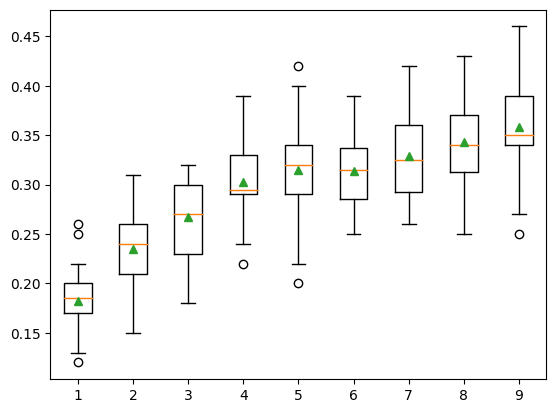

In [ ]:
# compare lda number of components with naive bayes algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
# get the dataset
def get_dataset():
  X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
  n_redundant=5, random_state=7, n_classes=10)
  return X, y
# get a list of models to evaluate

def get_models():
  models = dict()
  for i in range(1,10):
    steps = [('lda', LinearDiscriminantAnalysis(n_components=i)), ('m', GaussianNB())]
    models[str(i)] = Pipeline(steps=steps)
  return models
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

making a prediction with model fit on data after applying an LDA
transform.

In [ ]:
# make predictions using lda with naive bayes
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=7, n_classes=10)
# define the model
steps = [('lda', LinearDiscriminantAnalysis(n_components=9)), ('m', GaussianNB())]
model = Pipeline(steps=steps)
# fit the model on the whole dataset

model.fit(X, y)
# make a single prediction
row = [[2.3548775, -1.69674567, 1.6193882, -1.19668862, -2.85422348, -2.00998376,
16.56128782, 2.57257575, 9.93779782, 0.43415008, 6.08274911, 2.12689336, 1.70100279,
3.32160983, 13.02048541, -3.05034488, 2.06346747, -3.33390362, 2.45147541, -1.23455205]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 6


# Chapter 29 How to Perform PCA Dimensionality Reduction

## Worked Example of PCA for Dimensionality Reduction

In [ ]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=7)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


evaluating a model on data prepared with an PCA transform.

In [ ]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean

from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=7)
# define the pipeline
steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.816 (0.034)


exploring the change model performance with the number of selected
components in the PCA transform.

>1 0.542 (0.048)
>2 0.713 (0.048)
>3 0.720 (0.053)
>4 0.723 (0.051)
>5 0.725 (0.052)
>6 0.730 (0.046)
>7 0.805 (0.036)
>8 0.800 (0.037)
>9 0.814 (0.036)
>10 0.816 (0.034)
>11 0.819 (0.035)
>12 0.819 (0.038)
>13 0.819 (0.035)
>14 0.853 (0.029)
>15 0.865 (0.027)
>16 0.865 (0.027)
>17 0.865 (0.027)
>18 0.865 (0.027)
>19 0.865 (0.027)
>20 0.865 (0.027)


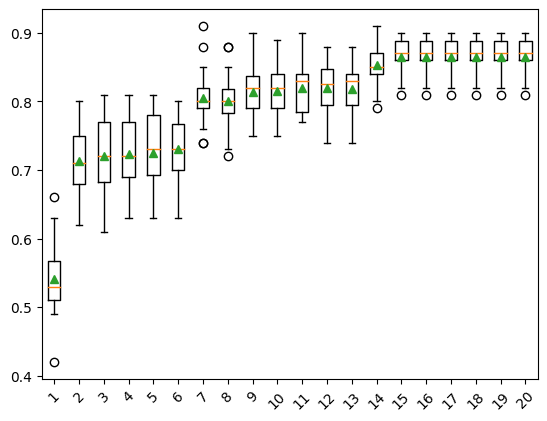

In [ ]:
# compare pca number of components with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# get the dataset
def get_dataset():
  X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
  n_redundant=5, random_state=7)
  return X, y
# get a list of models to evaluate
def get_models():
  models = dict()
  for i in range(1,21):
    steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
    models[str(i)] = Pipeline(steps=steps)
  return models
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

making a prediction with model fit on data after applying an PCA
transform.

In [ ]:
# make predictions using pca with logistic regression
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=7)
# define the model
steps = [('pca', PCA(n_components=15)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[0.2929949, -4.21223056, -1.288332, -2.17849815, -0.64527665, 2.58097719,
0.28422388, -7.1827928, -1.91211104, 2.73729512, 0.81395695, 3.96973717, -2.66939799,
3.34692332, 4.19791821, 0.99990998, -0.30201875, -4.43170633, -2.82646737, 0.44916808]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


# Chapter 30 How to Perform SVD Dimensionality Reduction

## Worked Example of SVD for Dimensionality

defining a synthetic classification dataset.

In [ ]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=7)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


evaluating a model on data prepared with an SVD transform.

In [ ]:
# evaluate svd with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=7)
# define the pipeline
steps = [('svd', TruncatedSVD(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.814 (0.034)


exploring the change model performance with the number of selected
components in the SVD transform.

>1 0.542 (0.046)
>2 0.626 (0.050)
>3 0.719 (0.053)
>4 0.722 (0.052)
>5 0.721 (0.054)
>6 0.729 (0.045)
>7 0.802 (0.034)
>8 0.800 (0.040)
>9 0.814 (0.037)
>10 0.814 (0.034)
>11 0.817 (0.037)
>12 0.820 (0.038)
>13 0.820 (0.036)
>14 0.825 (0.036)
>15 0.865 (0.027)
>16 0.865 (0.027)
>17 0.865 (0.027)
>18 0.865 (0.027)
>19 0.865 (0.027)


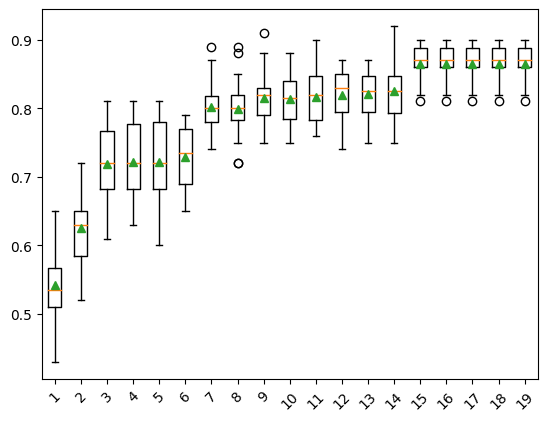

In [ ]:
# compare svd number of components with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# get the dataset
def get_dataset():
  X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
  n_redundant=5, random_state=7)
  return X, y
# get a list of models to evaluate
def get_models():
  models = dict()
  for i in range(1,20):
    steps = [('svd', TruncatedSVD(n_components=i)), ('m', LogisticRegression())]
    models[str(i)] = Pipeline(steps=steps)
  return models
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

making a prediction with model fit on data after applying an SVD
transform.

In [ ]:
# make predictions using svd with logistic regression
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
random_state=7)
# define the model
steps = [('svd', TruncatedSVD(n_components=15)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[0.2929949, -4.21223056, -1.288332, -2.17849815, -0.64527665, 2.58097719,
0.28422388, -7.1827928, -1.91211104, 2.73729512, 0.81395695, 3.96973717, -2.66939799,
3.34692332, 4.19791821, 0.99990998, -0.30201875, -4.43170633, -2.82646737, 0.44916808]]

yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1
